# <center> Consumer Financial Company</center>
#### The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

####  The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

</a>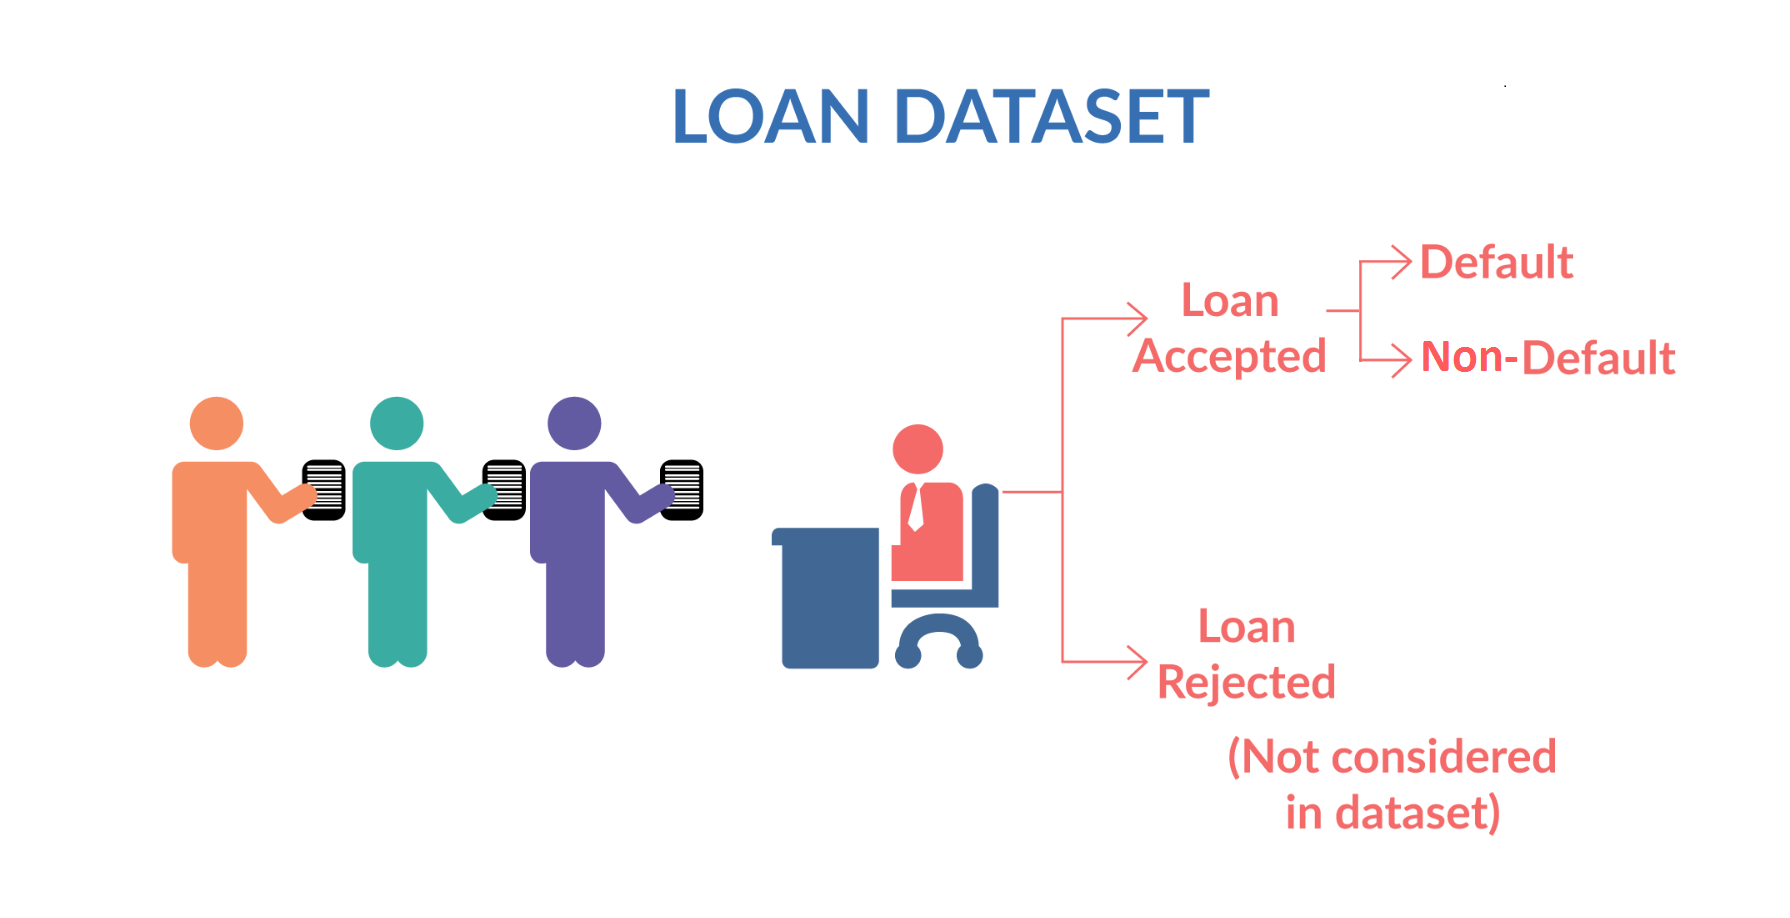

In [198]:
#import all the libraries which is required like pandas , numpy , matplotlib , seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [199]:
# load the loan dataset 
loan = pd.read_csv("loan.csv")
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Understanding

In [200]:

loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [201]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [202]:
loan.shape

(39717, 111)

In [203]:
print(loan.count())

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
                              ...  
tax_liens                     39678
tot_hi_cred_lim                   0
total_bal_ex_mort                 0
total_bc_limit                    0
total_il_high_credit_limit        0
Length: 111, dtype: int64


In [204]:
# Delete the column which have 0 data 
loan =loan[[cols for cols in loan  if loan[cols].count()>0]]

In [205]:
print(loan.count())

id                            39717
member_id                     39717
loan_amnt                     39717
funded_amnt                   39717
funded_amnt_inv               39717
term                          39717
int_rate                      39717
installment                   39717
grade                         39717
sub_grade                     39717
emp_title                     37258
emp_length                    38642
home_ownership                39717
annual_inc                    39717
verification_status           39717
issue_d                       39717
loan_status                   39717
pymnt_plan                    39717
url                           39717
desc                          26777
purpose                       39717
title                         39706
zip_code                      39717
addr_state                    39717
dti                           39717
delinq_2yrs                   39717
earliest_cr_line              39717
inq_last_6mths              

In [206]:
len(loan.columns) #dataset column after removing all the columns which having   value   zero

57

In [207]:
loan.isnull().sum()   # checking null value in each columns

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [208]:
#  Drop the columns which have the highest number of missing value
loan = loan.drop(['emp_title','desc','title','mths_since_last_delinq','mths_since_last_record','next_pymnt_d','pub_rec_bankruptcies',],axis=1)


In [209]:
# Check the null values again for analysis
loan.isnull().sum()

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util          

In [210]:
loan.info()  #check the information of each columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

# Fill Up  the missing values


In [211]:
loan.annual_inc.describe()     # check the annual income count , mean , standard deviation etc 

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [212]:
# Value of count of employee length
loan.emp_length.value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [213]:
# Categories the annual values to the column 'annual_inc_cat' range 0-6000000


bins = [0,10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 6000000]
labels = [ '<10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','>90000']
loan['annual_inc_cat'] = pd.cut(loan['annual_inc'], bins=bins, labels=labels)

#Convert the Derived segmented column type to Object
loan['annual_inc_cat'] = loan['annual_inc_cat'].astype('object')

In [214]:
loan['annual_inc_cat'].value_counts()   # check the value counts of annual_inc_cat

>90000         7755
40000-50000    5867
50000-60000    5741
30000-40000    5253
60000-70000    4221
70000-80000    3640
20000-30000    3435
80000-90000    2616
10000-20000    1090
<10000           99
Name: annual_inc_cat, dtype: int64

In [215]:
loan.head()  # check for the column added or not

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,annual_inc_cat
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,20000-30000
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,20000-30000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,10000-20000
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,40000-50000
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,70000-80000


In [216]:
loan.emp_length.value_counts() # So , I got to know the 10+year is highest value

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [217]:
loan.isnull().sum()
# Now handle the emp_length column null value

id                               0
member_id                        0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_length                    1075
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
url                              0
purpose                          0
zip_code                         0
addr_state                       0
dti                              0
delinq_2yrs                      0
earliest_cr_line                 0
inq_last_6mths                   0
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util          

In [218]:
loan["emp_length"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 39717 entries, 0 to 39716
Series name: emp_length
Non-Null Count  Dtype 
--------------  ----- 
38642 non-null  object
dtypes: object(1)
memory usage: 310.4+ KB


In [219]:
 loan[loan["emp_length"].isnull()==True].head() # checking which are the null values in emp_lenght

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,tax_liens,annual_inc_cat
168,1067644,1302032,2500,2500,2500.0,36 months,7.51%,77.78,A,A3,...,77.78,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,10000-20000
323,1058717,1290516,18000,18000,18000.0,60 months,17.58%,452.98,D,D4,...,6909.59,Sep-15,0.0,1,INDIVIDUAL,0,0.0,0,0.0,50000-60000
394,1064582,1298394,4000,4000,4000.0,36 months,11.71%,132.31,B,B3,...,3658.15,May-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,20000-30000
422,1064366,1298164,1000,1000,1000.0,36 months,14.65%,34.50,C,C3,...,34.50,Jun-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,10000-20000
439,1063912,1296491,8250,8250,8250.0,36 months,7.51%,256.67,A,A3,...,278.92,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,30000-40000


In [220]:
# To fill the null value replace with '10+year' as it have hihghest number 
loan['emp_length'] = loan['emp_length'].fillna('10+ years')


In [221]:
loan.emp_length.value_counts() # null value got filled wit 10+ year 

10+ years    9954
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [222]:
loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_li

In [223]:
#  remove the missing value 
loan = loan[~(loan["last_credit_pull_d"].isnull()==True)]

In [224]:
loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_li

In [225]:
loan = loan[~(loan["revol_util"].isnull())]

In [226]:
loan.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
purpose                        0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_li

In [227]:
loan.shape

(39665, 51)

In [228]:
#  Drop the last_pymnt_d, collection_12_mths_ex_med,chargeoff_within_12_mths,tax_liens
loan = loan.drop(["last_pymnt_d","collections_12_mths_ex_med","chargeoff_within_12_mths","tax_liens"],axis=1)

In [229]:
loan.shape

(39665, 47)

In [230]:
loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
pymnt_plan                 0
url                        0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
initial_list_status        0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [231]:
loan.describe()  # describe the all columns

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,acc_now_delinq,delinq_amnt
count,3.966500e+04,3.966500e+04,39665.000000,39665.000000,39665.000000,39665.000000,3.966500e+04,39665.000000,39665.000000,39665.00000,...,39665.000000,39665.000000,39665.000000,39665.000000,39665.000000,39665.000000,39665.000000,39665.0,39665.0,39665.0
mean,6.833483e+05,8.507530e+05,11228.078911,10955.992058,10406.261853,324.782255,6.899756e+04,13.319258,0.146502,0.86923,...,11577.534873,9801.790355,2265.472266,1.362535,95.192629,12.387385,2681.740867,1.0,0.0,0.0
std,2.106526e+05,2.655842e+05,7456.556314,7187.080315,7128.305768,208.881347,6.379042e+04,6.676678,0.491601,1.07044,...,8943.095899,7065.405108,2609.161021,7.292683,689.086978,148.714953,4449.248865,0.0,0.0,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0
25%,5.163270e+05,6.670040e+05,5500.000000,5400.000000,5000.000000,167.080000,4.051464e+04,8.180000,0.000000,0.00000,...,5125.020000,4600.000000,662.870000,0.000000,0.000000,0.000000,219.040000,1.0,0.0,0.0
50%,6.660240e+05,8.512350e+05,10000.000000,9625.000000,8975.000000,280.610000,5.900000e+04,13.410000,0.000000,1.00000,...,9294.740000,8000.000000,1350.910000,0.000000,0.000000,0.000000,547.100000,1.0,0.0,0.0
75%,8.378720e+05,1.047530e+06,15000.000000,15000.000000,14400.000000,430.780000,8.240000e+04,18.600000,0.000000,1.00000,...,15810.930000,13700.000000,2836.260000,0.000000,0.000000,0.000000,3300.370000,1.0,0.0,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.00000,...,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,0.0,0.0


In [232]:
# Drop the columm which have not effect the column
loan = loan.drop(["policy_code","acc_now_delinq","delinq_amnt"],axis=1)

In [233]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,3.966500e+04,3.966500e+04,39665.000000,39665.000000,39665.000000,39665.000000,3.966500e+04,39665.000000,39665.000000,39665.00000,...,39665.000000,39665.000000,39665.000000,39665.000000,39665.000000,39665.000000,39665.000000,39665.000000,39665.000000,39665.000000
mean,6.833483e+05,8.507530e+05,11228.078911,10955.992058,10406.261853,324.782255,6.899756e+04,13.319258,0.146502,0.86923,...,51.295046,51.056615,12163.817704,11577.534873,9801.790355,2265.472266,1.362535,95.192629,12.387385,2681.740867
std,2.106526e+05,2.655842e+05,7456.556314,7187.080315,7128.305768,208.881347,6.379042e+04,6.676678,0.491601,1.07044,...,375.414098,374.064859,9042.531961,8943.095899,7065.405108,2609.161021,7.292683,689.086978,148.714953,4449.248865
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.163270e+05,6.670040e+05,5500.000000,5400.000000,5000.000000,167.080000,4.051464e+04,8.180000,0.000000,0.00000,...,0.000000,0.000000,5581.772363,5125.020000,4600.000000,662.870000,0.000000,0.000000,0.000000,219.040000
50%,6.660240e+05,8.512350e+05,10000.000000,9625.000000,8975.000000,280.610000,5.900000e+04,13.410000,0.000000,1.00000,...,0.000000,0.000000,9918.807154,9294.740000,8000.000000,1350.910000,0.000000,0.000000,0.000000,547.100000
75%,8.378720e+05,1.047530e+06,15000.000000,15000.000000,14400.000000,430.780000,8.240000e+04,18.600000,0.000000,1.00000,...,0.000000,0.000000,16543.860000,15810.930000,13700.000000,2836.260000,0.000000,0.000000,0.000000,3300.370000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.00000,...,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000


{'whiskers': [<matplotlib.lines.Line2D at 0x239e90b17b0>,
 'caps': [<matplotlib.lines.Line2D at 0x239e90b1d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x239e90b1240>],
 'medians': [<matplotlib.lines.Line2D at 0x239e90b22f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x239e90b25c0>],
 'means': []}

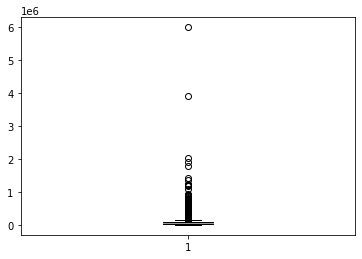

In [234]:
plt.boxplot(loan.annual_inc)   # check for the ouliers

In [235]:
len(loan)

39665

In [236]:
#  SO clear the outlier which is greate than 2000000
%matplotlib inline
loan= loan[loan["annual_inc"]<=200000]

{'whiskers': [<matplotlib.lines.Line2D at 0x239e91178e0>,
 'caps': [<matplotlib.lines.Line2D at 0x239e9117e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x239e9117610>],
 'medians': [<matplotlib.lines.Line2D at 0x239e9894460>],
 'fliers': [<matplotlib.lines.Line2D at 0x239e9894730>],
 'means': []}

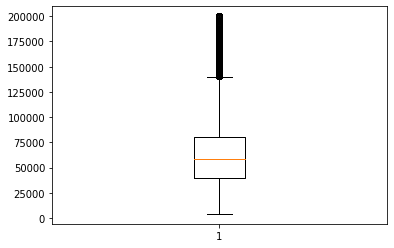

In [237]:
plt.boxplot(loan.annual_inc)

In [238]:
loan.annual_inc.quantile([0.95,0.50,1,0.75,0.25])

0.95    130000.0
0.50     58000.0
1.00    200000.0
0.75     80004.0
0.25     40000.0
Name: annual_inc, dtype: float64

# Data Cleaning


In [239]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,application_type,annual_inc_cat
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,INDIVIDUAL,20000-30000
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,INDIVIDUAL,20000-30000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,INDIVIDUAL,10000-20000
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,INDIVIDUAL,40000-50000
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,INDIVIDUAL,70000-80000


In [240]:
def func1(x):
    return x.replace('months','').strip()
# replace the months with space

In [241]:
loan["term"] = loan["term"].apply(func1)

In [242]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,application_type,annual_inc_cat
0,1077501,1296599,5000,5000,4975.0,36,10.65%,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,INDIVIDUAL,20000-30000
1,1077430,1314167,2500,2500,2500.0,60,15.27%,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,INDIVIDUAL,20000-30000
2,1077175,1313524,2400,2400,2400.0,36,15.96%,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,INDIVIDUAL,10000-20000
3,1076863,1277178,10000,10000,10000.0,36,13.49%,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,INDIVIDUAL,40000-50000
4,1075358,1311748,3000,3000,3000.0,60,12.69%,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,INDIVIDUAL,70000-80000


In [243]:
def fun2(x):
    return x.replace("%",'').strip()

In [244]:
loan["int_rate"] = loan["int_rate"].apply(fun2)

In [245]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,application_type,annual_inc_cat
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,INDIVIDUAL,20000-30000
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,INDIVIDUAL,20000-30000
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,INDIVIDUAL,10000-20000
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,INDIVIDUAL,40000-50000
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,INDIVIDUAL,70000-80000


In [246]:
loan.loc[:,"sub_grade":]  # check for other columns after sub_grade

,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,application_type,annual_inc_cat
0,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,...,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,INDIVIDUAL,20000-30000
1,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,INDIVIDUAL,20000-30000
2,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,...,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,INDIVIDUAL,10000-20000
3,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,INDIVIDUAL,40000-50000
4,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,INDIVIDUAL,70000-80000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,...,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,Jun-10,INDIVIDUAL,>90000
39713,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,...,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,Jul-10,INDIVIDUAL,10000-20000
39714,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,...,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,Jun-07,INDIVIDUAL,>90000
39715,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,...,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,Jun-07,INDIVIDUAL,>90000


In [247]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39080 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39080 non-null  int64  
 1   member_id                39080 non-null  int64  
 2   loan_amnt                39080 non-null  int64  
 3   funded_amnt              39080 non-null  int64  
 4   funded_amnt_inv          39080 non-null  float64
 5   term                     39080 non-null  object 
 6   int_rate                 39080 non-null  object 
 7   installment              39080 non-null  float64
 8   grade                    39080 non-null  object 
 9   sub_grade                39080 non-null  object 
 10  emp_length               39080 non-null  object 
 11  home_ownership           39080 non-null  object 
 12  annual_inc               39080 non-null  float64
 13  verification_status      39080 non-null  object 
 14  issue_d               

In [248]:
#  change the int rate into float type
loan["int_rate"] = loan["int_rate"].astype("float64")

In [249]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39080 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39080 non-null  int64  
 1   member_id                39080 non-null  int64  
 2   loan_amnt                39080 non-null  int64  
 3   funded_amnt              39080 non-null  int64  
 4   funded_amnt_inv          39080 non-null  float64
 5   term                     39080 non-null  object 
 6   int_rate                 39080 non-null  float64
 7   installment              39080 non-null  float64
 8   grade                    39080 non-null  object 
 9   sub_grade                39080 non-null  object 
 10  emp_length               39080 non-null  object 
 11  home_ownership           39080 non-null  object 
 12  annual_inc               39080 non-null  float64
 13  verification_status      39080 non-null  object 
 14  issue_d               

In [250]:
loan["term"] = loan["term"].astype("int64")   # term change the data type into integer

In [251]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39080 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39080 non-null  int64  
 1   member_id                39080 non-null  int64  
 2   loan_amnt                39080 non-null  int64  
 3   funded_amnt              39080 non-null  int64  
 4   funded_amnt_inv          39080 non-null  float64
 5   term                     39080 non-null  int64  
 6   int_rate                 39080 non-null  float64
 7   installment              39080 non-null  float64
 8   grade                    39080 non-null  object 
 9   sub_grade                39080 non-null  object 
 10  emp_length               39080 non-null  object 
 11  home_ownership           39080 non-null  object 
 12  annual_inc               39080 non-null  float64
 13  verification_status      39080 non-null  object 
 14  issue_d               

In [252]:
def func4(x):
    return x.replace("%",'').strip()

In [253]:
loan["revol_util"] = loan["revol_util"].apply(func4)

In [254]:
loan["revol_util"]=loan["revol_util"].astype("float64")

In [255]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,application_type,annual_inc_cat
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,INDIVIDUAL,20000-30000
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,INDIVIDUAL,20000-30000
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,INDIVIDUAL,10000-20000
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,INDIVIDUAL,40000-50000
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,INDIVIDUAL,70000-80000


In [256]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39080 entries, 0 to 39716
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39080 non-null  int64  
 1   member_id                39080 non-null  int64  
 2   loan_amnt                39080 non-null  int64  
 3   funded_amnt              39080 non-null  int64  
 4   funded_amnt_inv          39080 non-null  float64
 5   term                     39080 non-null  int64  
 6   int_rate                 39080 non-null  float64
 7   installment              39080 non-null  float64
 8   grade                    39080 non-null  object 
 9   sub_grade                39080 non-null  object 
 10  emp_length               39080 non-null  object 
 11  home_ownership           39080 non-null  object 
 12  annual_inc               39080 non-null  float64
 13  verification_status      39080 non-null  object 
 14  issue_d               

# Now I am seprating the Quantative Analysis and Catgorical Analysis

In [257]:
cateogrical_dataframe_of_loan = loan.copy()  # so I have copy the entire data set into seprate variable

In [258]:
cateogrical_dataframe_of_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,application_type,annual_inc_cat
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,INDIVIDUAL,20000-30000
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,INDIVIDUAL,20000-30000
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,INDIVIDUAL,10000-20000
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,INDIVIDUAL,40000-50000
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,INDIVIDUAL,70000-80000


In [259]:
cateogrical_dataframe_of_loan.select_dtypes('O').columns  # select the column which is object type

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'purpose', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_credit_pull_d', 'application_type',
       'annual_inc_cat'],
      dtype='object')

In [260]:
# So To make the analysis better , I have to drop the column which is not effecting my analysis pymnt_plan','url','zip_code','initial_list_status','application_type

cateogrical_dataframe_of_loan.drop(["url","zip_code","initial_list_status","pymnt_plan","application_type"],axis=1,inplace=True)

In [261]:
cateogrical_dataframe_of_loan.select_dtypes('O').columns

Index(['grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'earliest_cr_line', 'last_credit_pull_d',
       'annual_inc_cat'],
      dtype='object')

In [262]:
quntativs_datafram_of_loan = cateogrical_dataframe_of_loan.select_dtypes(['float64',"int64"]) # fetch the columns which is of int and float dattype

In [263]:
quntativs_datafram_of_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],
      dtype='object')

In [264]:
quntativs_datafram_of_loan["loan_status"] = cateogrical_dataframe_of_loan["loan_status"] # take the target variable in quntativs_datafram_of_loan

In [265]:
quntativs_datafram_of_loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'loan_status'],
      dtype='object')

In [266]:
# drop the column in data column which is not required
quntativs_datafram_of_loan.drop(['id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt'],axis=1,inplace=True)

In [267]:
quntativs_datafram_of_loan.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_util',
       'loan_status'],
      dtype='object')

In [268]:
quntativs_datafram_of_loan.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,loan_status
0,5000,36,10.65,162.87,24000.0,27.65,0,1,3,0,83.7,Fully Paid
1,2500,60,15.27,59.83,30000.0,1.00,0,5,3,0,9.4,Charged Off
2,2400,36,15.96,84.33,12252.0,8.72,0,2,2,0,98.5,Fully Paid
3,10000,36,13.49,339.31,49200.0,20.00,0,1,10,0,21.0,Fully Paid
4,3000,60,12.69,67.79,80000.0,17.94,0,0,15,0,53.9,Current


In [269]:
cateogrical_dataframe_of_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,annual_inc_cat
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,20000-30000
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,20000-30000
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,10000-20000
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,40000-50000
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,...,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,67.79,May-16,70000-80000


# Univariate - Categorical Variables Analysis

In [270]:
# Target variable i.e loan_status only Charged Off to check the defauters
catigory = cateogrical_dataframe_of_loan[cateogrical_dataframe_of_loan['loan_status'] == 'Charged Off']
numbers = quntativs_datafram_of_loan[quntativs_datafram_of_loan['loan_status'] == 'Charged Off']

In [271]:
data = catigory.groupby(by="term").count()
m = data.reset_index().sort_values('term',ascending=False)
m

,term,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,annual_inc_cat
1,60,2372,2372,2372,2372,2372,2372,2372,2372,2372,...,2372,2372,2372,2372,2372,2372,2372,2372,2372,2372
0,36,3178,3178,3178,3178,3178,3178,3178,3178,3178,...,3178,3178,3178,3178,3178,3178,3178,3178,3178,3178


In [272]:
m["count"]  = m["id"]   # To give the seperate variable of total count of charged_off people

Text(0.5, 1.0, 'Total Terms of Charge Off')

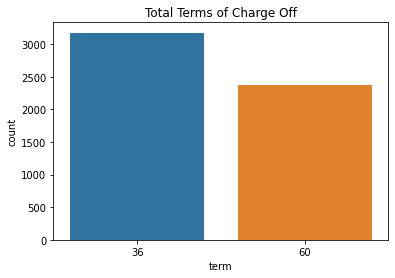

In [273]:
checking_of_the_tenur = sb.barplot(x="term", y="count" ,data=m)
plt.title('Total Terms of Charge Off')

In [274]:

data_grade = catigory.groupby(by="grade").count()

data_grade

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,annual_inc_cat
grade,,,,,,,,,,,,,,,,,,,,,
A,601,601,601,601,601,601,601,601,601,601,...,601,601,601,601,601,601,601,601,601,601
B,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410,...,1410,1410,1410,1410,1410,1410,1410,1410,1410,1410
C,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335,...,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335
D,1106,1106,1106,1106,1106,1106,1106,1106,1106,1106,...,1106,1106,1106,1106,1106,1106,1106,1106,1106,1106
E,697,697,697,697,697,697,697,697,697,697,...,697,697,697,697,697,697,697,697,697,697
F,306,306,306,306,306,306,306,306,306,306,...,306,306,306,306,306,306,306,306,306,306
G,95,95,95,95,95,95,95,95,95,95,...,95,95,95,95,95,95,95,95,95,95


Text(0.5, 1.0, 'Grade of Charge_Off Customer')

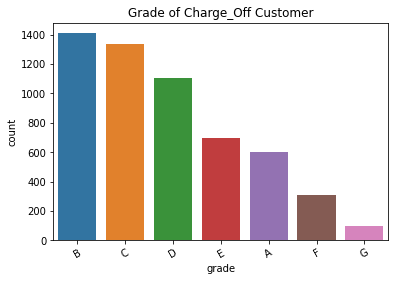

In [275]:
data = catigory.groupby('grade')['grade'].count().reset_index(name='count').sort_values('count',ascending=False)
q = sb.barplot(x="grade", y="count", data=data)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Grade of Charge_Off Customer')

In [276]:
laon_sub_grade = catigory.groupby(by="sub_grade").count()
loan_reset_index= laon_sub_grade.reset_index()
loan_reset_index

,sub_grade,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,annual_inc_cat
0,A1,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
1,A2,74,74,74,74,74,74,74,74,74,...,74,74,74,74,74,74,74,74,74,74
2,A3,103,103,103,103,103,103,103,103,103,...,103,103,103,103,103,103,103,103,103,103
3,A4,178,178,178,178,178,178,178,178,178,...,178,178,178,178,178,178,178,178,178,178
4,A5,216,216,216,216,216,216,216,216,216,...,216,216,216,216,216,216,216,216,216,216
5,B1,170,170,170,170,170,170,170,170,170,...,170,170,170,170,170,170,170,170,170,170
6,B2,224,224,224,224,224,224,224,224,224,...,224,224,224,224,224,224,224,224,224,224
7,B3,334,334,334,334,334,334,334,334,334,...,334,334,334,334,334,334,334,334,334,334
8,B4,327,327,327,327,327,327,327,327,327,...,327,327,327,327,327,327,327,327,327,327
9,B5,355,355,355,355,355,355,355,355,355,...,355,355,355,355,355,355,355,355,355,355


In [277]:
#   To make the y_axis name count , I would like to add  the one column name  'count'
loan_reset_index['count']=loan_reset_index['id'] 

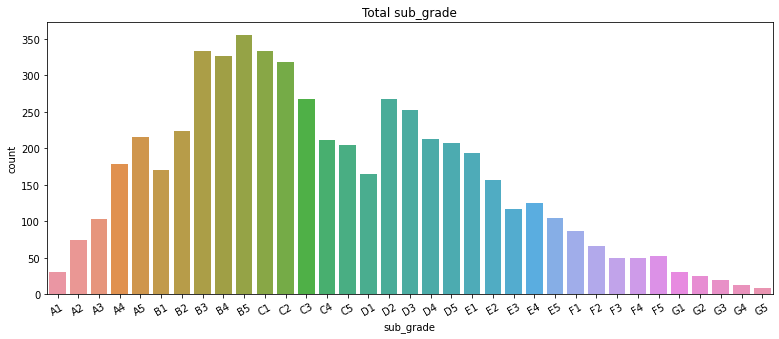

In [278]:
plt.figure(figsize=[13,5])
data_of_sub_grade_graph = sb.barplot(x='sub_grade',y='count',data=loan_reset_index)
data_of_sub_grade_graph.set_xticklabels(data_of_sub_grade_graph.get_xticklabels(),rotation=30)
plt.title('Total sub_grade')
plt.show()

In [279]:
m2 = catigory.groupby(by='emp_length').count()
data_emp_lenght=m2.reset_index()
data_emp_lenght['count'] =data_emp_lenght["id"]

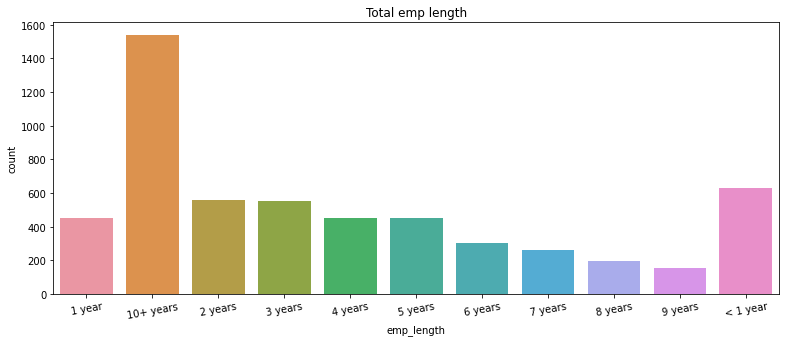

In [280]:
plt.figure(figsize=[13,5])
emp_length_graph = sb.barplot(x='emp_length',y='count',data= data_emp_lenght)
emp_length_graph.set_xticklabels(emp_length_graph.get_xticklabels(),rotation=10)
plt.title('Total emp length')
plt.show()

In [281]:
m3 = catigory.groupby(by="home_ownership").count()
data_home_ownership = m3.reset_index()
data_home_ownership["count"] =data_home_ownership["id"]

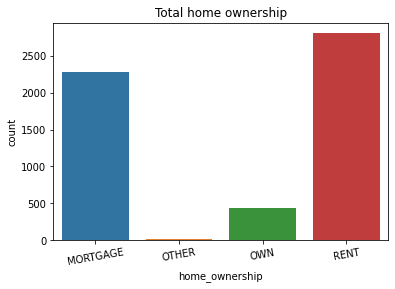

In [282]:

data_home_ownership_graph = sb.barplot(x='home_ownership',y='count',data= data_home_ownership)
data_home_ownership_graph.set_xticklabels(data_home_ownership_graph.get_xticklabels(),rotation=10)

plt.title('Total home ownership')
plt.show()

In [283]:
m4 = catigory.groupby(by='verification_status').count()
data_verifaction_status = m4.reset_index()
data_verifaction_status['count'] = data_verifaction_status['id']
data_verifaction_status

,verification_status,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,annual_inc_cat,count
0,Not Verified,2118,2118,2118,2118,2118,2118,2118,2118,2118,...,2118,2118,2118,2118,2118,2118,2118,2118,2118,2118
1,Source Verified,1415,1415,1415,1415,1415,1415,1415,1415,1415,...,1415,1415,1415,1415,1415,1415,1415,1415,1415,1415
2,Verified,2017,2017,2017,2017,2017,2017,2017,2017,2017,...,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017


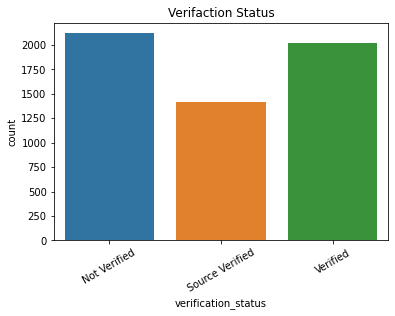

In [284]:
data_verifaction_status_graph = sb.barplot(x='verification_status',y='count',data = data_verifaction_status)
plt.title("Verifaction Status")
plt.xticks(rotation=30)
plt.show()

In [285]:
m5 = catigory.groupby(by='purpose').count()
data_purpose = m5.reset_index()
data_purpose['count'] = data_purpose['id']

Text(0.5, 1.0, 'Purpose Count')

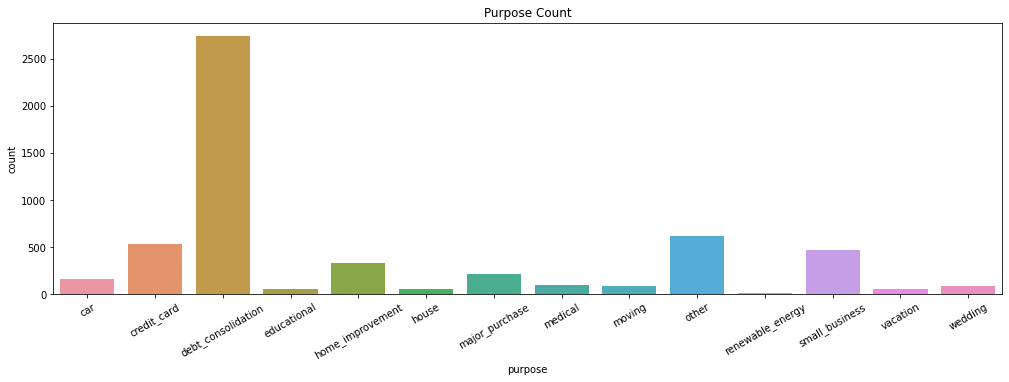

In [286]:
plt.figure(figsize=[17,5])

data_purpose_graph = sb.barplot(x='purpose',y='count',data=data_purpose)
data_purpose_graph.set_xticklabels(data_purpose_graph.get_xticklabels(),rotation=30)
plt.title("Purpose Count")


In [287]:
m6 = catigory.groupby(by='addr_state').count()
data_addr_state = m6.reset_index()
data_addr_state['count'] = data_addr_state['id']
data_addr_state

,addr_state,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,annual_inc_cat,count
0,AK,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
1,AL,53,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
2,AR,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
3,AZ,120,120,120,120,120,120,120,120,120,...,120,120,120,120,120,120,120,120,120,120
4,CA,1109,1109,1109,1109,1109,1109,1109,1109,1109,...,1109,1109,1109,1109,1109,1109,1109,1109,1109,1109
5,CO,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97
6,CT,94,94,94,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
7,DC,15,15,15,15,15,15,15,15,15,...,15,15,15,15,15,15,15,15,15,15
8,DE,11,11,11,11,11,11,11,11,11,...,11,11,11,11,11,11,11,11,11,11
9,FL,495,495,495,495,495,495,495,495,495,...,495,495,495,495,495,495,495,495,495,495


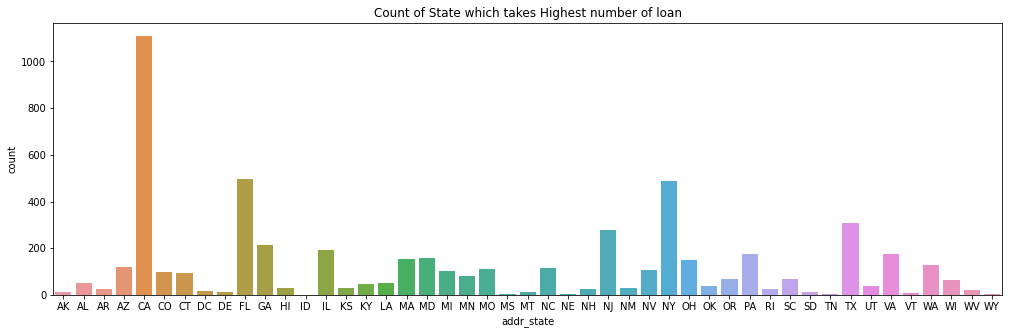

In [288]:
plt.figure(figsize=[17,5])
data_addr_state_graph = sb.barplot(x='addr_state',y='count',data=data_addr_state)
plt.title("Count of State which takes Highest number of loan")
plt.show()

# Derived Materics 
#### Check for the column which is to be created other column which make sense to the data

In [289]:
# Convert the issue_date into datetime and extract the month and year
catigory['issue_d'] = pd.to_datetime(catigory['issue_d'],format='%b-%y')
catigory['issue_d'].info()

<class 'pandas.core.series.Series'>
Int64Index: 5550 entries, 1 to 39688
Series name: issue_d
Non-Null Count  Dtype         
--------------  -----         
5550 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 86.7 KB


In [290]:
catigory["issue_d_month"] = pd.DatetimeIndex(catigory['issue_d']).month

In [291]:
catigory["issue_d_year"] = pd.DatetimeIndex(catigory['issue_d']).year

In [292]:
catigory.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,annual_inc_cat,issue_d_month,issue_d_year
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,456.46,435.17,0.0,117.08,1.1100,119.66,Sep-13,20000-30000,12,2011
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,...,162.02,294.94,0.0,189.06,2.0900,152.39,Aug-12,30000-40000,12,2011
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,...,673.48,533.42,0.0,269.29,2.5200,121.45,Mar-13,10000-20000,12,2011
12,1064687,1298717,9000,9000,9000.0,36,13.49,305.38,C,C1,...,1256.14,570.26,0.0,444.30,4.1600,305.38,Nov-12,20000-30000,12,2011
14,1069057,1303503,10000,10000,10000.0,36,10.65,325.74,B,B2,...,5433.47,1393.42,0.0,645.10,6.3145,325.74,Mar-14,>90000,12,2011


In [293]:
# check for the count of loan taken in each year
m7 = catigory.groupby(by="issue_d_year").count()
data_issu_d_year = m7.reset_index()
data_issu_d_year['count'] =data_issu_d_year['id']

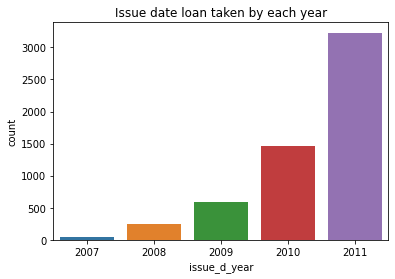

In [294]:
data_issue_d_year_graph = sb.barplot(x='issue_d_year',y='count',data=data_issu_d_year)
plt.title("Issue date loan taken by each year")
plt.show()

In [295]:
# Check for the issue_d_month
catigory["issue_d_month"] = pd.DatetimeIndex(catigory['issue_d']).month

In [296]:
m8 = catigory.groupby(by="issue_d_month").count()
data_issu_d_month = m8.reset_index()
data_issu_d_month['count'] =data_issu_d_month['id']

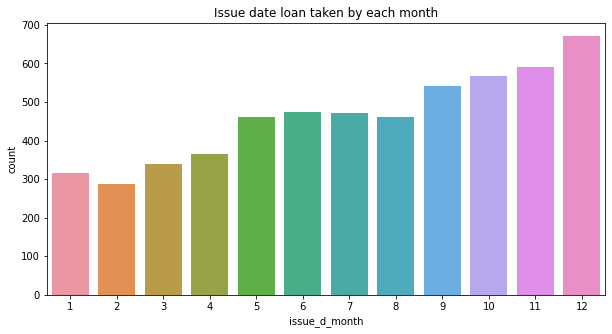

In [297]:
plt.figure(figsize=[10,5])

data_issue_d_month_graph = sb.barplot(x='issue_d_month',y='count',data=data_issu_d_month)
plt.title("Issue date loan taken by each month")
plt.show()

In [298]:
# check for the earliest_cr_line
catigory['earliest_cr_line'] = pd.to_datetime(catigory['earliest_cr_line'],format='%b-%y')
catigory['earliest_cr_line'].head()

1    1999-04-01
8    2004-04-01
9    2004-09-01
12   2004-04-01
14   1991-05-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [299]:
catigory['earliest_cr_line_year'] = pd.DatetimeIndex(catigory['earliest_cr_line']).year

In [300]:
m9 = catigory.groupby(by='earliest_cr_line_year').count()
data_earliest_cr_line_year = m9.reset_index()
data_earliest_cr_line_year['count'] = data_earliest_cr_line_year['id']

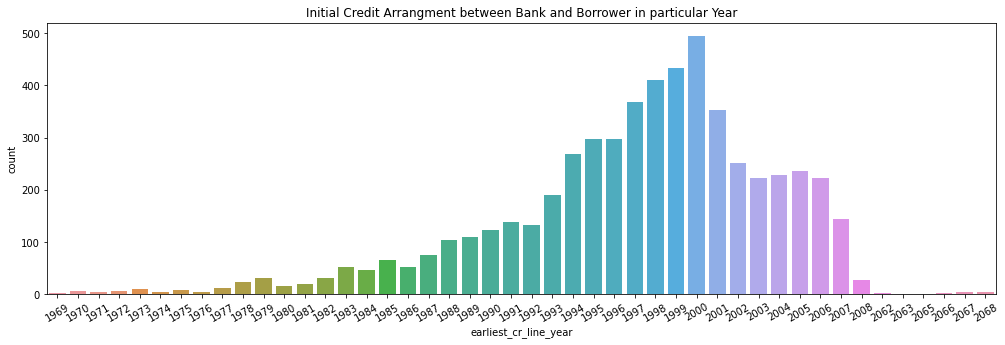

In [301]:
plt.figure(figsize=[17,5])
data_earliest_cr_line_year_graph = sb.barplot(x='earliest_cr_line_year',y='count',data=data_earliest_cr_line_year)
data_earliest_cr_line_year_graph.set_xticklabels(data_earliest_cr_line_year_graph.get_xticklabels(),rotation=30)
plt.title('Initial Credit Arrangment between Bank and Borrower in particular Year')
plt.show()

In [302]:
# earliest_cr_line_month in data
catigory['earliest_cr_line_month'] = pd.DatetimeIndex(catigory['earliest_cr_line']).month

In [303]:
m10 = catigory.groupby(by='earliest_cr_line_month').count()
data_earliest_cr_line_month = m10.reset_index()
data_earliest_cr_line_month['count'] = data_earliest_cr_line_month['id']

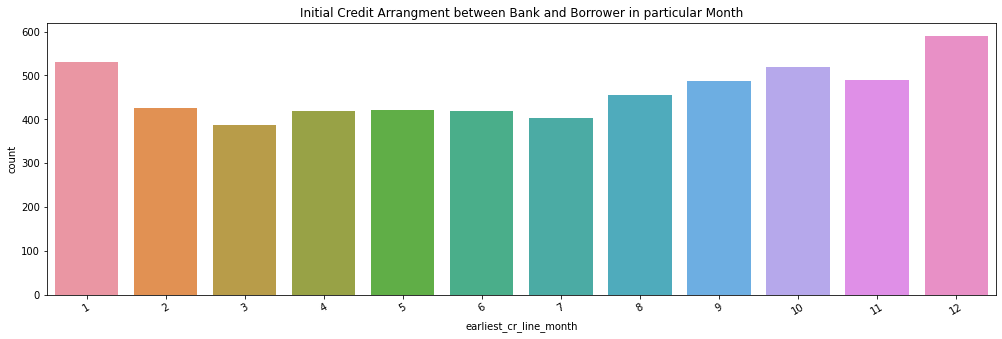

In [304]:
plt.figure(figsize=[17,5])
data_earliest_cr_line_month_graph = sb.barplot(x='earliest_cr_line_month',y='count',data=data_earliest_cr_line_month)
data_earliest_cr_line_month_graph.set_xticklabels(data_earliest_cr_line_month_graph.get_xticklabels(),rotation=30)
plt.title('Initial Credit Arrangment between Bank and Borrower in particular Month')
plt.show()

Text(0.5, 1.0, 'Total last_credit_pull_d_year')

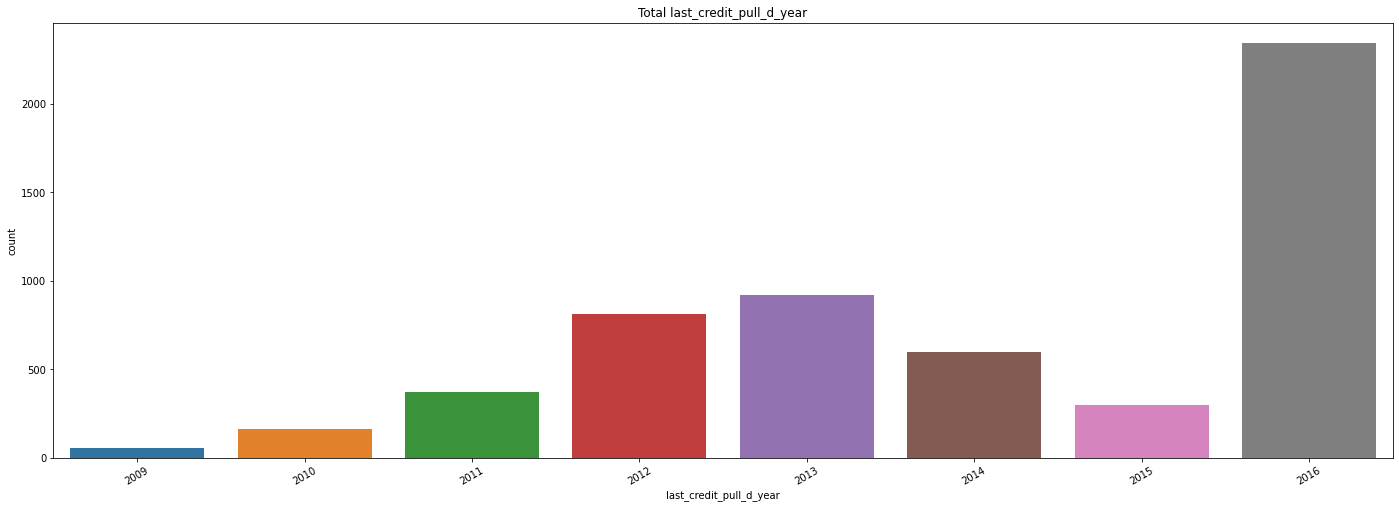

In [305]:
catigory['last_credit_pull_d'] = pd.to_datetime(catigory['last_credit_pull_d'], format='%b-%y')
#extract year
catigory['last_credit_pull_d_year'] = catigory['last_credit_pull_d'].map(lambda x : x.year)

df = catigory.groupby('last_credit_pull_d_year')['last_credit_pull_d_year'].count().reset_index(name='count').sort_values('count',ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
m11 = sb.barplot(x="last_credit_pull_d_year", y="count", data=df)
m11.set_xticklabels(m11.get_xticklabels(),rotation=30)
plt.title('Total last_credit_pull_d_year')

# Univariate - Quantitative Variables Analysis

In [306]:
numbers["loan_amnt"].head()

1      2500
8      5600
9      5375
12     9000
14    10000
Name: loan_amnt, dtype: int64

In [307]:
numbers.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,loan_status
1,2500,60,15.27,59.83,30000.0,1.00,0,5,3,0,9.4,Charged Off
8,5600,60,21.28,152.39,40000.0,5.55,0,2,11,0,32.6,Charged Off
9,5375,60,12.69,121.45,15000.0,18.08,0,0,2,0,36.5,Charged Off
12,9000,36,13.49,305.38,30000.0,10.08,0,1,4,0,91.7,Charged Off
14,10000,36,10.65,325.74,100000.0,7.06,0,2,14,0,55.5,Charged Off


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

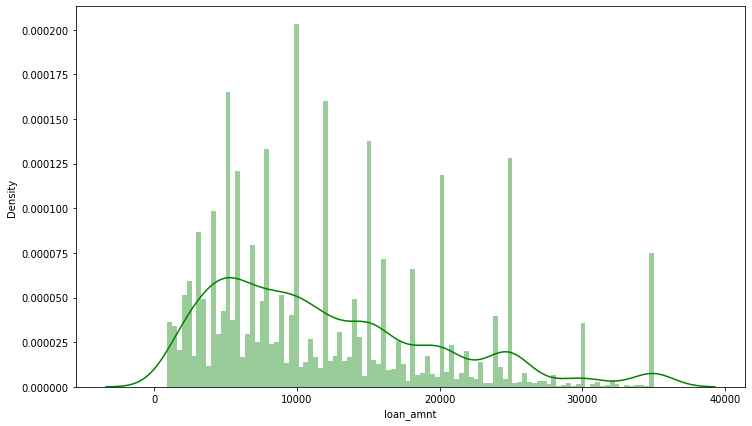

In [308]:
plt.figure(figsize=(12,7))
sb.distplot(numbers['loan_amnt'],color='green',bins=100) # make the distplot to check the variation of loan amount

<AxesSubplot:xlabel='installment', ylabel='Density'>

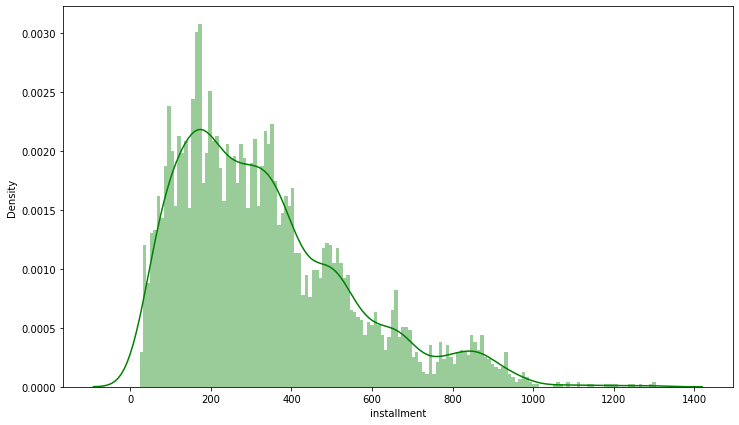

In [309]:
plt.figure(figsize=(12,7))
sb.distplot(numbers['installment'],color='green',bins=150)

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

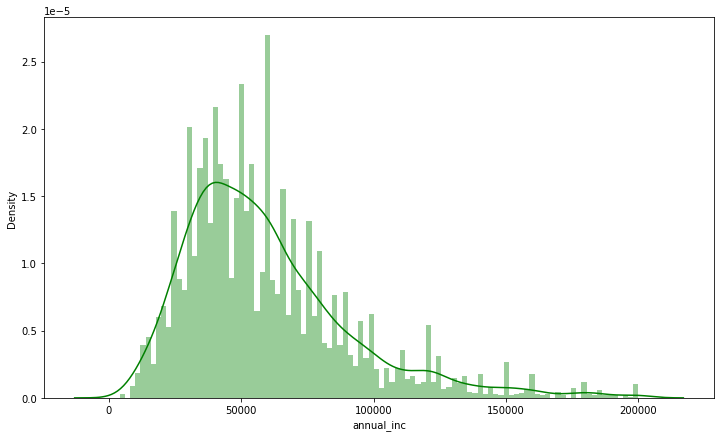

In [310]:
plt.figure(figsize=(12,7))
sb.distplot(numbers['annual_inc'],color='green',bins=100)

<AxesSubplot:xlabel='dti', ylabel='Density'>

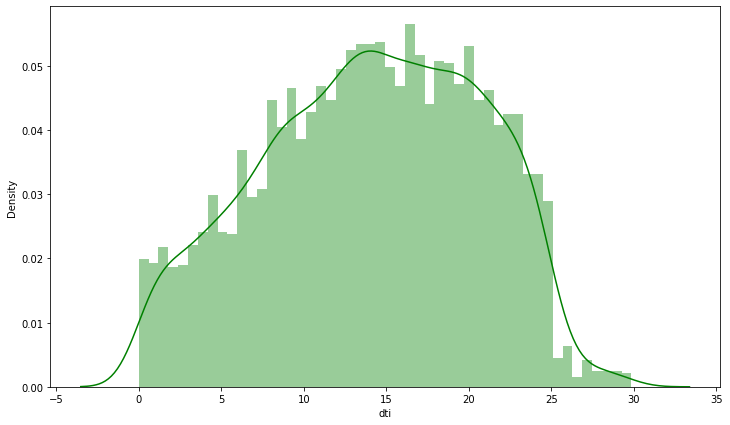

In [311]:
plt.figure(figsize=(12,7))
sb.distplot(numbers['dti'],color='green',bins=50)

<AxesSubplot:xlabel='delinq_2yrs', ylabel='Density'>

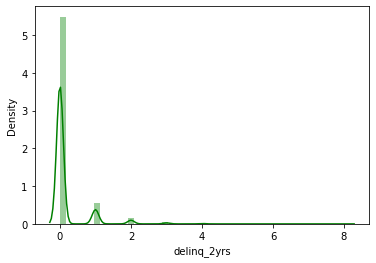

In [312]:
sb.distplot(numbers['delinq_2yrs'],color='green',bins=50)

<AxesSubplot:xlabel='inq_last_6mths', ylabel='Density'>

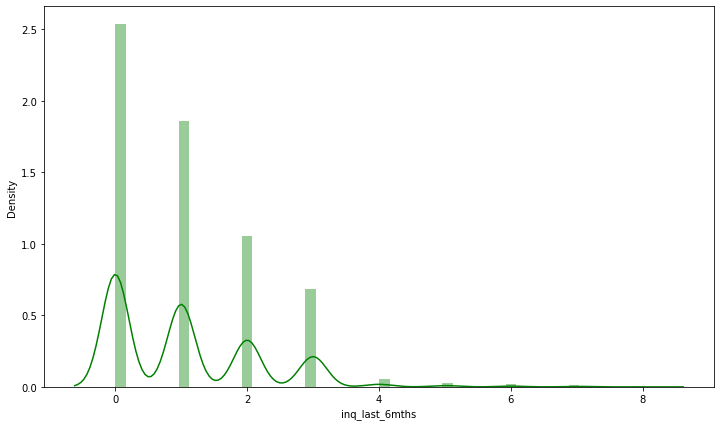

In [313]:
plt.figure(figsize=(12,7))
sb.distplot(numbers['inq_last_6mths'],color='green',bins=50)

<AxesSubplot:xlabel='open_acc', ylabel='Density'>

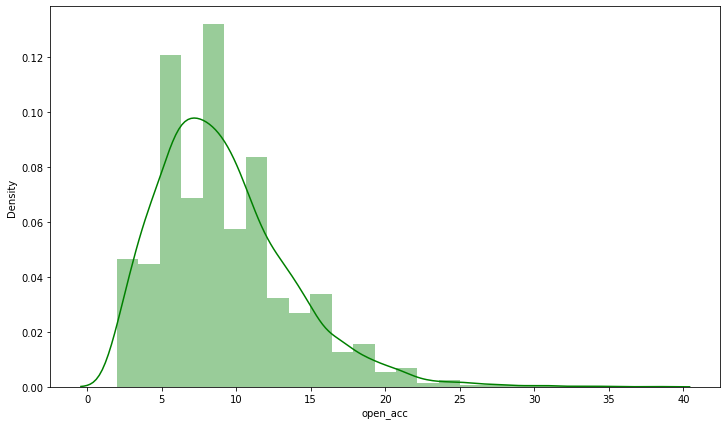

In [314]:
plt.figure(figsize=(12,7))
sb.distplot(numbers['open_acc'],color='green',bins=25)

<AxesSubplot:xlabel='revol_util', ylabel='Density'>

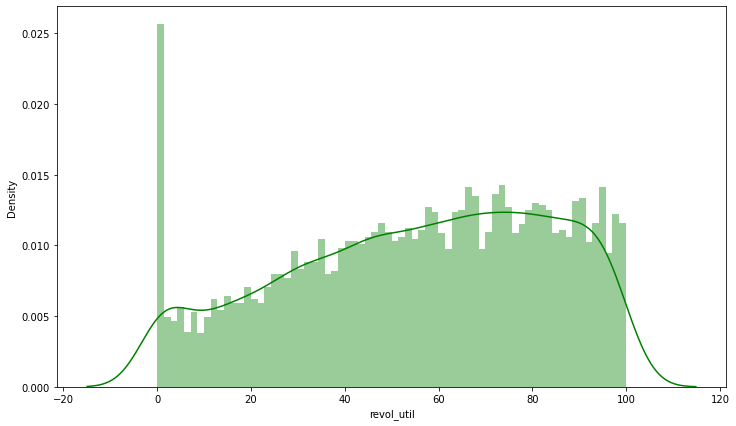

In [315]:
plt.figure(figsize=(12,7))
sb.distplot(numbers['revol_util'],color='green',bins=70)

<AxesSubplot:xlabel='pub_rec', ylabel='Density'>

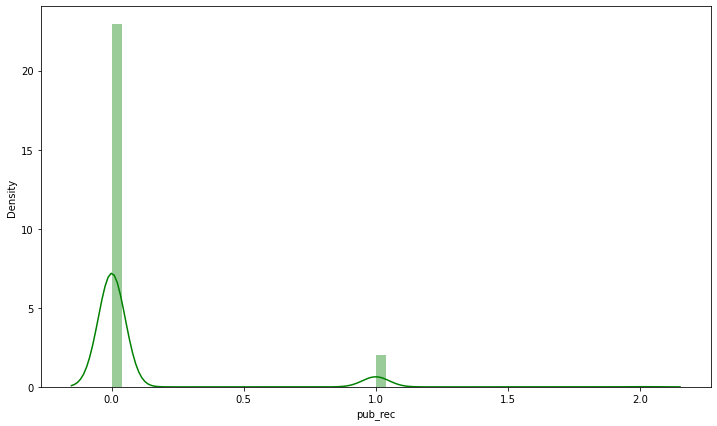

In [316]:
plt.figure(figsize=(12,7))
sb.distplot(numbers['pub_rec'],color='green',bins=50)

In [317]:
numbers.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,loan_status
1,2500,60,15.27,59.83,30000.0,1.00,0,5,3,0,9.4,Charged Off
8,5600,60,21.28,152.39,40000.0,5.55,0,2,11,0,32.6,Charged Off
9,5375,60,12.69,121.45,15000.0,18.08,0,0,2,0,36.5,Charged Off
12,9000,36,13.49,305.38,30000.0,10.08,0,1,4,0,91.7,Charged Off
14,10000,36,10.65,325.74,100000.0,7.06,0,2,14,0,55.5,Charged Off


# Bivarite Analysis
## check for the two variables

In [318]:
catigory.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,annual_inc_cat,issue_d_month,issue_d_year,earliest_cr_line_year,earliest_cr_line_month,last_credit_pull_d_year
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,117.08,1.1100,119.66,2013-09-01,20000-30000,12,2011,1999,4,2013
8,1071795,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,...,189.06,2.0900,152.39,2012-08-01,30000-40000,12,2011,2004,4,2012
9,1071570,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,...,269.29,2.5200,121.45,2013-03-01,10000-20000,12,2011,2004,9,2013
12,1064687,1298717,9000,9000,9000.0,36,13.49,305.38,C,C1,...,444.30,4.1600,305.38,2012-11-01,20000-30000,12,2011,2004,4,2012
14,1069057,1303503,10000,10000,10000.0,36,10.65,325.74,B,B2,...,645.10,6.3145,325.74,2014-03-01,>90000,12,2011,1991,5,2014


In [319]:
numbers.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,loan_status
1,2500,60,15.27,59.83,30000.0,1.00,0,5,3,0,9.4,Charged Off
8,5600,60,21.28,152.39,40000.0,5.55,0,2,11,0,32.6,Charged Off
9,5375,60,12.69,121.45,15000.0,18.08,0,0,2,0,36.5,Charged Off
12,9000,36,13.49,305.38,30000.0,10.08,0,1,4,0,91.7,Charged Off
14,10000,36,10.65,325.74,100000.0,7.06,0,2,14,0,55.5,Charged Off


In [320]:
# check for the fully paid and Charged Off
catigory = cateogrical_dataframe_of_loan[cateogrical_dataframe_of_loan["loan_status"]!="Current"]
numbers = quntativs_datafram_of_loan[quntativs_datafram_of_loan["loan_status"]!="Current"]

In [321]:
term = catigory[['loan_status','term']]
catigory.groupby(by=['term','loan_status']).count()   # check for the two variable term and loan_status

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
term loan_status                                                              
36   Charged Off   3178       3178       3178         3178             3178   
     Fully Paid   25465      25465      25465        25465            25465   
60   Charged Off   2372       2372       2372         2372             2372   
     Fully Paid    6941       6941       6941         6941             6941   

                  int_rate  installment  grade  sub_grade  emp_length  ...  \
term loan_status                                                       ...   
36   Charged Off      3178         3178   3178       3178        3178  ...   
     Fully Paid      25465        25465  25465      25465       25465  ...   
60   Charged Off      2372         2372   2372       2372        2372  ...   
     Fully Paid       6941         6941   6941       6941        6941  ...   

                  total_pymnt  total_pymnt_inv  total_rec_prncp  \
term loan_status                                                  
36   Charged Off         3178             3178             3178   
     Fully Paid         25465            25465            25465   
60   Charged Off         2372             2372             2372   
     Fully Paid          6941             6941             6941   

                  total_rec_int  total_rec_late_fee  recoveries  \
term loan_status                                                  
36   Charged Off           3178                3178        3178   
     Fully Paid           25465               25465       25465   
60   Charged Off           2372                2372        2372   
     Fully Paid            6941                6941        6941   

                  collection_recovery_fee  last_pymnt_amnt  \
term loan_status                                             
36   Charged Off                     3178             3178   
     Fully Paid                     25465            25465   
60   Charged Off                     2372             2372   
     Fully Paid                      6941             6941   

                  last_credit_pull_d  annual_inc_cat  
term loan_status                                      
36   Charged Off                3178            3178  
     Fully Paid                25465           25465  
60   Charged Off                2372            2372  
     Fully Paid                 6941            6941  

[4 rows x 37 columns]

In [322]:
# check only for temur
tenur  = catigory.groupby(by=['loan_status','term'])['term'].count()
tenur

loan_status  term
Charged Off  36       3178
             60       2372
Fully Paid   36      25465
             60       6941
Name: term, dtype: int64

In [323]:
data_tenur_graph = tenur.reset_index(name='total_per')  # reset the index and make the column name tot_per
data_tenur_graph

,loan_status,term,total_per
0,Charged Off,36,3178
1,Charged Off,60,2372
2,Fully Paid,36,25465
3,Fully Paid,60,6941


<AxesSubplot:xlabel='term', ylabel='total_per'>

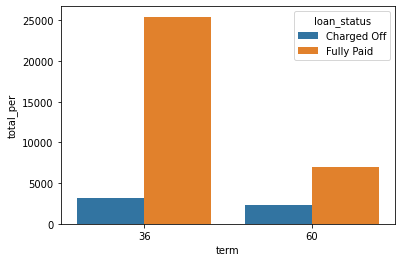

In [324]:
sb.barplot(x='term',y='total_per',hue='loan_status',data=data_tenur_graph)  

In [325]:
m13 = tenur.groupby(level=0).apply(lambda x:round(100 * x/float(x.sum()), 2))   # Convert into percentage and level zero use to check for particular loan_Status
data_tenur_per_graph = m13.reset_index(name='total_per')
data_tenur_per_graph

,loan_status,term,total_per
0,Charged Off,36,57.26
1,Charged Off,60,42.74
2,Fully Paid,36,78.58
3,Fully Paid,60,21.42


Text(0.5, 1.0, 'Laon Status of particular tenur period in percentage')

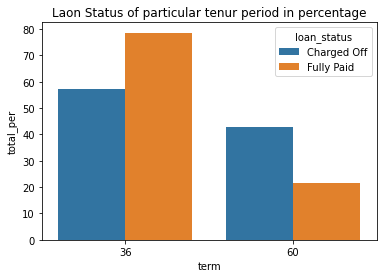

In [326]:
sb.barplot(x='term',y='total_per',hue='loan_status',data=data_tenur_per_graph)
plt.title("Laon Status of particular tenur period in percentage")

In [327]:
loan_grades = catigory.groupby(by=["loan_status","grade"]).count()
loan_grades


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
loan_status grade                                                              
Charged Off A        601        601        601          601              601   
            B       1410       1410       1410         1410             1410   
            C       1335       1335       1335         1335             1335   
            D       1106       1106       1106         1106             1106   
            E        697        697        697          697              697   
            F        306        306        306          306              306   
            G         95         95         95           95               95   
Fully Paid  A       9350       9350       9350         9350             9350   
            B      10107      10107      10107        10107            10107   
            C       6364       6364       6364         6364             6364   
            D       3879       3879       3879         3879             3879   
            E       1886       1886       1886         1886             1886   
            F        631        631        631          631              631   
            G        189        189        189          189              189   

                    term  int_rate  installment  sub_grade  emp_length  ...  \
loan_status grade                                                       ...   
Charged Off A        601       601          601        601         601  ...   
            B       1410      1410         1410       1410        1410  ...   
            C       1335      1335         1335       1335        1335  ...   
            D       1106      1106         1106       1106        1106  ...   
            E        697       697          697        697         697  ...   
            F        306       306          306        306         306  ...   
            G         95        95           95         95          95  ...   
Fully Paid  A       9350      9350         9350       9350        9350  ...   
            B      10107     10107        10107      10107       10107  ...   
            C       6364      6364         6364       6364        6364  ...   
            D       3879      3879         3879       3879        3879  ...   
            E       1886      1886         1886       1886        1886  ...   
            F        631       631          631        631         631  ...   
            G        189       189          189        189         189  ...   

                   total_pymnt  total_pymnt_inv  total_rec_prncp  \
loan_status grade                                                  
Charged Off A              601              601              601   
            B             1410             1410             1410   
            C             1335             1335             1335   
            D             1106             1106             1106   
            E              697              697              697   
            F              306              306              306   
            G               95               95               95   
Fully Paid  A             9350             9350             9350   
            B            10107            10107            10107   
            C             6364             6364             6364   
            D             3879             3879             3879   
            E             1886             1886             1886   
            F              631              631              631   
            G              189              189              189   

                   total_rec_int  total_rec_late_fee  recoveries  \
loan_status grade                                                  
Charged Off A                601                 601         601   
            B               1410                1410        1410   
            C               1335                1335        1335   
            D               1106               

In [328]:
grade = catigory.groupby(['loan_status','grade'])['grade'].count()  # check for the grade with respect to loan status
m14 = grade.groupby(level=0).apply(lambda x:round(100 * x/float(x.sum())))
data_grade_loan_graph =m14.reset_index(name='total_grade')
data_grade_loan_graph

,loan_status,grade,total_grade
0,Charged Off,A,11.0
1,Charged Off,B,25.0
2,Charged Off,C,24.0
3,Charged Off,D,20.0
4,Charged Off,E,13.0
5,Charged Off,F,6.0
6,Charged Off,G,2.0
7,Fully Paid,A,29.0
8,Fully Paid,B,31.0
9,Fully Paid,C,20.0


Text(0.5, 1.0, 'Data Grade Loan Graph')

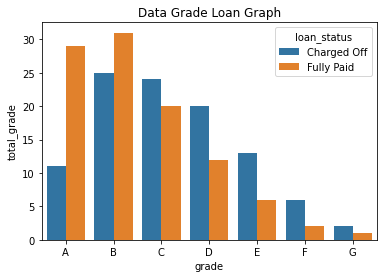

In [329]:
sb.barplot(x='grade',y='total_grade',hue='loan_status',data=data_grade_loan_graph)
plt.title("Data Grade Loan Graph")

In [330]:
data_sub_grade= catigory.groupby(by=['loan_status','sub_grade'])['sub_grade'].count()
data_sub_grade

loan_status  sub_grade
Charged Off  A1            30
             A2            74
             A3           103
             A4           178
             A5           216
                         ... 
Fully Paid   G1            61
             G2            47
             G3            24
             G4            39
             G5            18
Name: sub_grade, Length: 70, dtype: int64

In [331]:
m15 = data_sub_grade.groupby(level=0).apply(lambda x:round(100*x/float(x.sum())))
data_sub_grade_graph =m15.reset_index(name='tot_per')
data_sub_grade_graph
# m14 = grade.groupby(level=0).apply(lambda x:round(100 * x/float(x.sum())))

,loan_status,sub_grade,tot_per
0,Charged Off,A1,1.0
1,Charged Off,A2,1.0
2,Charged Off,A3,2.0
3,Charged Off,A4,3.0
4,Charged Off,A5,4.0
...,...,...,...
65,Fully Paid,G1,0.0
66,Fully Paid,G2,0.0
67,Fully Paid,G3,0.0
68,Fully Paid,G4,0.0


<AxesSubplot:xlabel='sub_grade', ylabel='tot_per'>

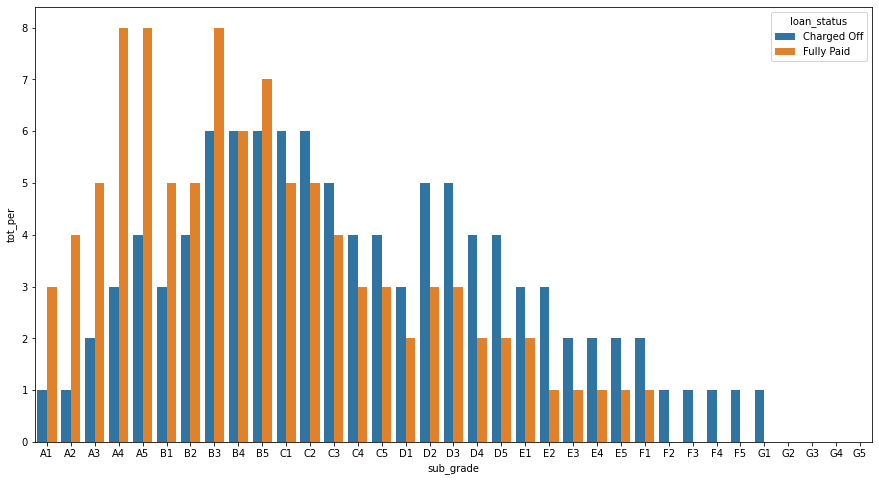

In [332]:
plt.figure(figsize=(15,8))
sb.barplot(x='sub_grade',y='tot_per',hue='loan_status',data=data_sub_grade_graph)


<AxesSubplot:title={'center':'Checking the percentage of emp length with fully paid and charged off '}, xlabel='emp_length', ylabel='tot_per'>

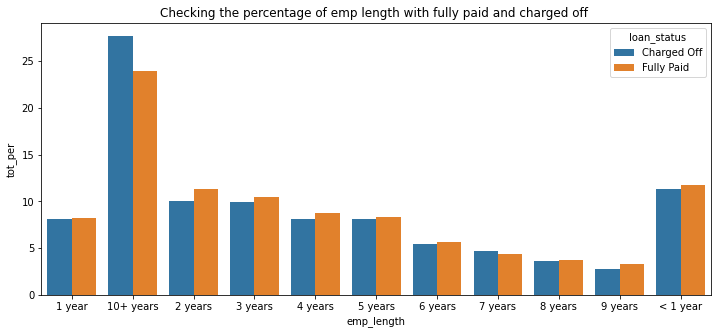

In [333]:
m15 = catigory.groupby(by=['loan_status','emp_length'])['emp_length'].count()
data_emp_length_charge_full_graph = m15.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
emp_length_loan_status_graph = data_emp_length_charge_full_graph.reset_index(name='tot_per')
plt.figure(figsize=(12,5))
plt.title("Checking the percentage of emp length with fully paid and charged off ")

sb.barplot(x='emp_length',y='tot_per',hue='loan_status',data=emp_length_loan_status_graph)

In [334]:
catigory['earliest_cr_line'] = pd.to_datetime(catigory['earliest_cr_line'],format='%b-%y')

In [335]:
catigory['earliest_cr_line_year'] = pd.DatetimeIndex(catigory['earliest_cr_line']).year

<AxesSubplot:title={'center':'Checking the percentage of earliest_cr_year with fully paid and charged off '}, xlabel='earliest_cr_line_year', ylabel='tot_per'>

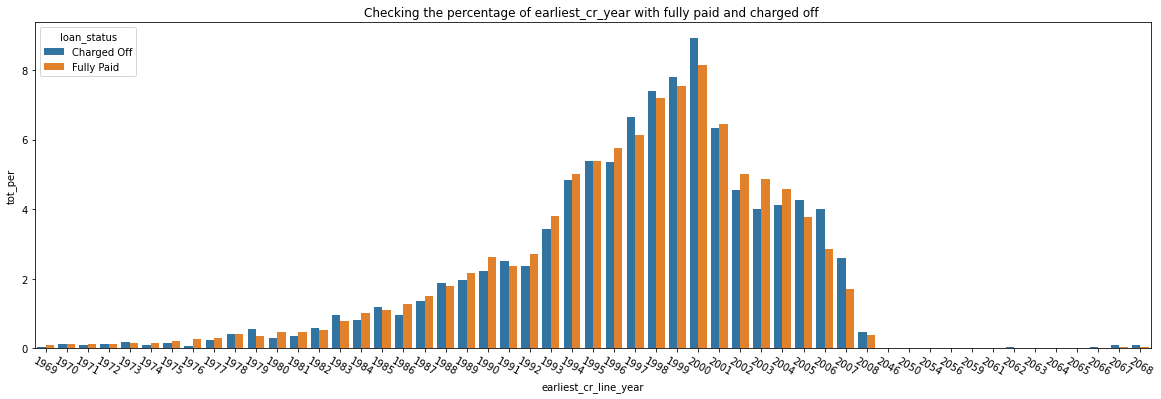

In [336]:
m16 = catigory.groupby(by=['loan_status','earliest_cr_line_year'])['earliest_cr_line_year'].count()
data_earliest_cr_line_year = m16.groupby(level=0).apply(lambda x:100*x/float(x.sum()))
dat_er_l_year_graph = data_earliest_cr_line_year.reset_index(name='tot_per')
plt.figure(figsize=(20,6))
plt.xticks(rotation=-30)
plt.title("Checking the percentage of earliest_cr_year with fully paid and charged off ")

sb.barplot(x='earliest_cr_line_year',y='tot_per',hue='loan_status',data=dat_er_l_year_graph)


In [337]:
catigory.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,annual_inc_cat,earliest_cr_line_year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,May-16,20000-30000,1985
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,Sep-13,20000-30000,1999
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,May-16,10000-20000,2001
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,Apr-16,40000-50000,1996
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,Jan-16,30000-40000,2004


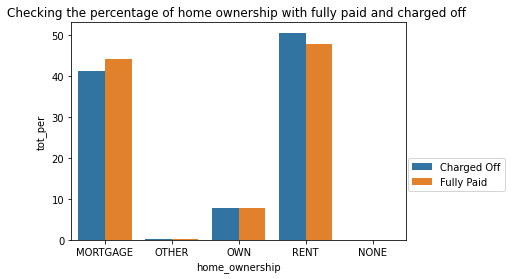

In [338]:
m17=catigory.groupby(by=['loan_status','home_ownership',])['home_ownership'].count()
data_home_ownership_loan_status= m17.groupby(level=0).apply(lambda x: 100 *x/ float(x.sum()))
data_home_ownership_loan_status_graph = data_home_ownership_loan_status.reset_index(name='tot_per')
plt.title("Checking the percentage of home ownership with fully paid and charged off ")

sb.barplot(x='home_ownership',y='tot_per',hue="loan_status",data=data_home_ownership_loan_status_graph)
plt.legend(bbox_to_anchor=(1.31,0.4))


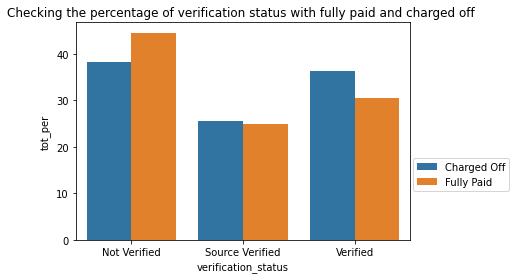

In [339]:
#  Check same for the verification status 
m17=catigory.groupby(by=['loan_status','verification_status',])['verification_status'].count()
data_verification_status_loan_status= m17.groupby(level=0).apply(lambda x: 100 *x/ float(x.sum()))
data_verifcation_status_loan_status_graph = data_verification_status_loan_status.reset_index(name='tot_per')
plt.title("Checking the percentage of verification status with fully paid and charged off ")

sb.barplot(x='verification_status',y='tot_per',hue="loan_status",data=data_verifcation_status_loan_status_graph)
plt.legend(bbox_to_anchor=(1.31,0.4))

<AxesSubplot:title={'center':'Checking the percentage of open purpose with fully paid and charged off '}, xlabel='purpose', ylabel='tot_per'>

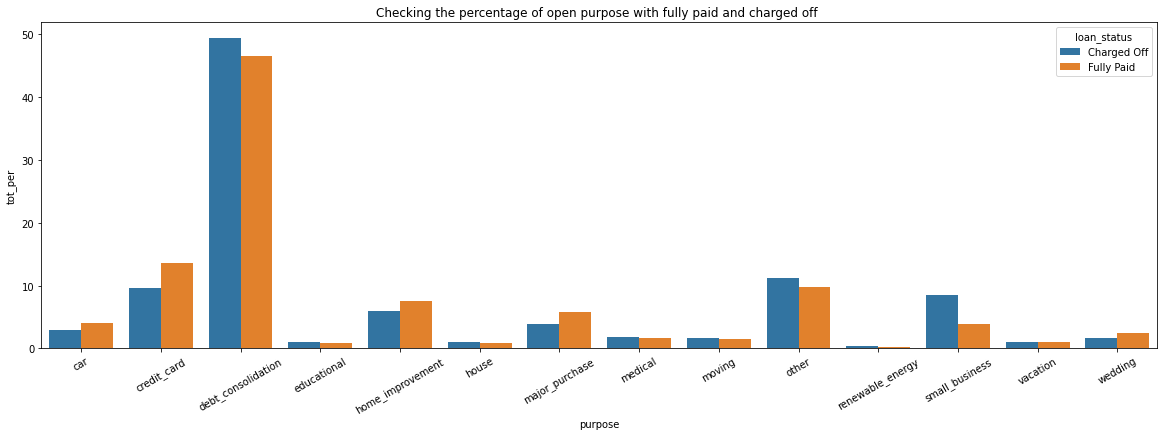

In [340]:
m18=catigory.groupby(by=['loan_status','purpose',])['purpose'].count()
data_purpose_loan_status= m18.groupby(level=0).apply(lambda x: 100 *x/ float(x.sum()))
data_purpose_loan_status_graph = data_purpose_loan_status.reset_index(name='tot_per')
plt.figure(figsize=(20,6))
plt.xticks(rotation=30)
plt.title("Checking the percentage of open purpose with fully paid and charged off ")

sb.barplot(x='purpose',y='tot_per',hue="loan_status",data=data_purpose_loan_status_graph)


<AxesSubplot:title={'center':'Checking the percentage of addr_state with fully paid and charged off '}, xlabel='addr_state', ylabel='total_per'>

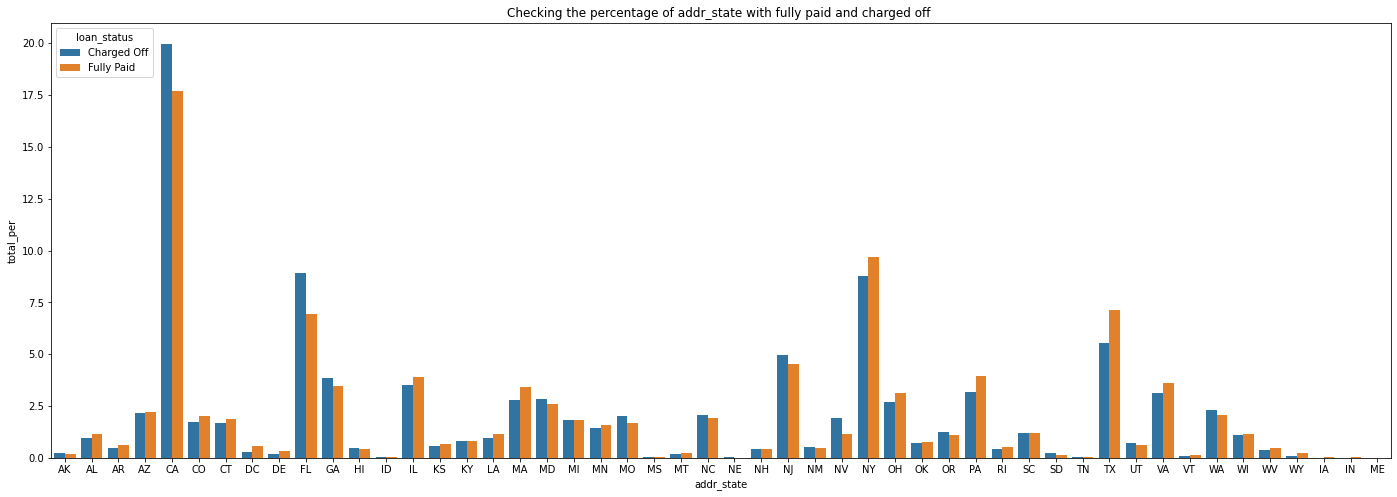

In [341]:
m19 = catigory.groupby(['loan_status','addr_state'])['addr_state'].count()
addr_state_loan_status = m19.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
addr_state_loan_status.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
plt.title("Checking the percentage of addr_state with fully paid and charged off ")

sb.barplot(x='addr_state', y='total_per', hue='loan_status',data=addr_state_loan_status)

# Derived Metrics Analysis

<AxesSubplot:title={'center':'Checking the percentage of issue_d_month with fully paid and charged off '}, xlabel='issue_d_month', ylabel='tot_per'>

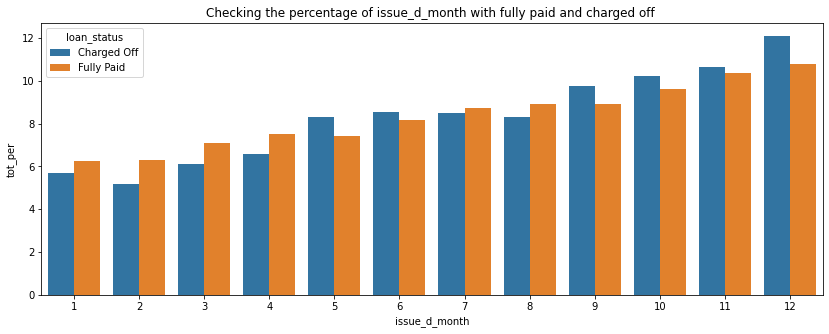

In [342]:
import warnings
warnings.filterwarnings("ignore")
# remove the warning 

# create a month , year seperately
catigory['issue_d'] = pd.to_datetime(catigory["issue_d"],format="%b-%y")
catigory["issue_d_month"] = pd.DatetimeIndex(catigory["issue_d"]).month
catigory["issue_d_year"] = pd.DatetimeIndex(catigory["issue_d"]).year

# Check the issue_d_m
m20 = catigory.groupby(by=['loan_status','issue_d_month'])['issue_d_month'].count()
data_issue_date_loan_status = m20.groupby(level=0).apply(lambda x: 100* x/float(x.sum()))
data_issu_date_loan_status_graph = data_issue_date_loan_status.reset_index(name='tot_per')
fig, ax = plt.subplots()
fig.set_size_inches(14,5)
plt.title("Checking the percentage of issue_d_month with fully paid and charged off ")

sb.barplot(x='issue_d_month',y='tot_per',hue = "loan_status",data=data_issu_date_loan_status_graph)

<AxesSubplot:title={'center':'Checking the percentage of earliest_cr_line_year with fully paid and charged off '}, xlabel='earliest_cr_line_year', ylabel='tot_per'>

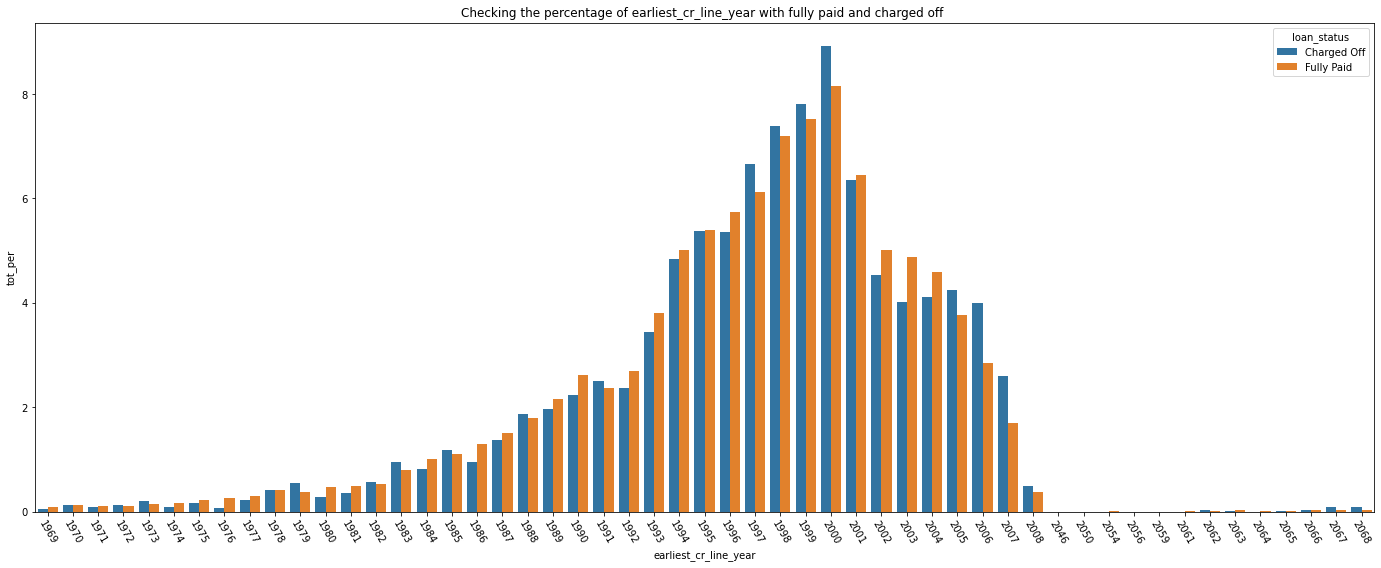

In [343]:
import warnings
warnings.filterwarnings("ignore")

m21 = catigory.groupby(by=['loan_status','earliest_cr_line_year'])['earliest_cr_line_year'].count()
data_earliest_cr_line_year = m21.groupby(level=0).apply(lambda x: 100* x/float(x.sum()))
data_earliest_cr_line_year_graph = data_earliest_cr_line_year.reset_index(name='tot_per')
fig, ax = plt.subplots()
fig.set_size_inches(24,9)
plt.xticks(rotation=-60)
plt.title("Checking the percentage of earliest_cr_line_year with fully paid and charged off ")

sb.barplot(x='earliest_cr_line_year',y='tot_per',hue = "loan_status",data=data_earliest_cr_line_year_graph)

In [344]:
numbers.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,loan_status
0,5000,36,10.65,162.87,24000.0,27.65,0,1,3,0,83.7,Fully Paid
1,2500,60,15.27,59.83,30000.0,1.00,0,5,3,0,9.4,Charged Off
2,2400,36,15.96,84.33,12252.0,8.72,0,2,2,0,98.5,Fully Paid
3,10000,36,13.49,339.31,49200.0,20.00,0,1,10,0,21.0,Fully Paid
5,5000,36,7.90,156.46,36000.0,11.20,0,3,9,0,28.3,Fully Paid


# Bivariate - Quantitative Variables and Segmented Analysis

In [345]:
numbers.loan_amnt.value_counts().sort_index(ascending=True)


500        5
725        1
750        1
800        1
900        2
        ... 
34475      5
34525      1
34675      1
34800      2
35000    527
Name: loan_amnt, Length: 864, dtype: int64

<AxesSubplot:title={'center':'Checking the percentage of loan amount category with fully paid and charged off '}, xlabel='loan_amnt_cat', ylabel='count_per'>

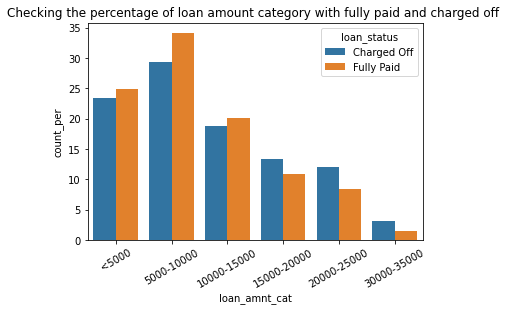

In [346]:
bins = [0,5000,10000,15000,20000,30000,350000]
labels = ['<5000','5000-10000','10000-15000','15000-20000','20000-25000','30000-35000']
numbers['loan_amnt_cat'] =pd.cut(numbers['loan_amnt'],bins=bins,labels=labels)
# seperate the loan amount into category

m21 = numbers.groupby(['loan_status','loan_amnt_cat'])['loan_amnt_cat'].count()
data_loan_amnt_grpah = m21.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
data_loan_amnt_grpah1 = data_loan_amnt_grpah.reset_index(name='count_per')
plt.xticks(rotation=30)
plt.title("Checking the percentage of loan amount category with fully paid and charged off ")

sb.barplot(x='loan_amnt_cat',y='count_per',hue='loan_status',data=data_loan_amnt_grpah1)


<AxesSubplot:title={'center':'Checking the percentage of Intrest rate with fully paid and charged off '}, xlabel='int_rate_cat', ylabel='total_per'>

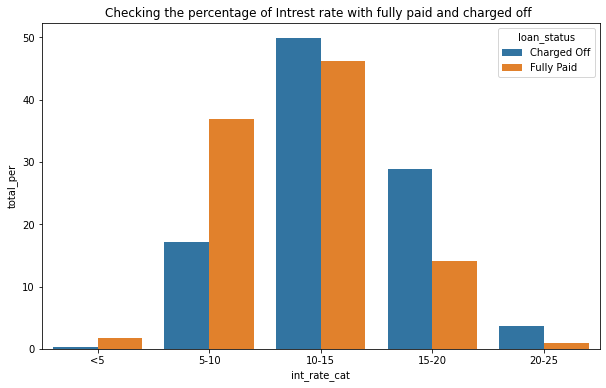

In [347]:

bins = [0,5.5,10.5,15.5,20.5,25.5]
labels = ['<5','5-10','10-15','15-20','20-25']
numbers['int_rate_cat'] = pd.cut(numbers['int_rate'],bins=bins,labels=labels)

int_rate = numbers.groupby(['loan_status','int_rate_cat'])['int_rate_cat'].count()
int_rate_per = int_rate.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
int_rate_per.sort_values('total_per', ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title("Checking the percentage of Intrest rate with fully paid and charged off ")
sb.barplot(x='int_rate_cat', y='total_per', hue='loan_status',data=int_rate_per)



<AxesSubplot:title={'center':'Checking the percentage of Installment Categories with fully paid and charged off '}, xlabel='installment_cat', ylabel='count_per'>

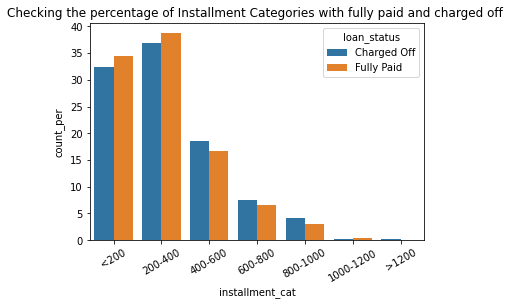

In [348]:
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]
labels = [ '<200','200-400','400-600','600-800','800-1000','1000-1200','>1200']
numbers['installment_cat'] = pd.cut(numbers['installment'], bins=bins, labels=labels)

# seperate for the installment category
m22 = numbers.groupby(['loan_status','installment_cat'])['installment_cat'].count()
data_installment_cat_grpah = m22.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
data_installment_cat_grpah1 = data_installment_cat_grpah.reset_index(name='count_per')
plt.title("Checking the percentage of Installment Categories with fully paid and charged off ")

plt.xticks(rotation=30)
sb.barplot(x='installment_cat',y='count_per',hue='loan_status',data=data_installment_cat_grpah1)

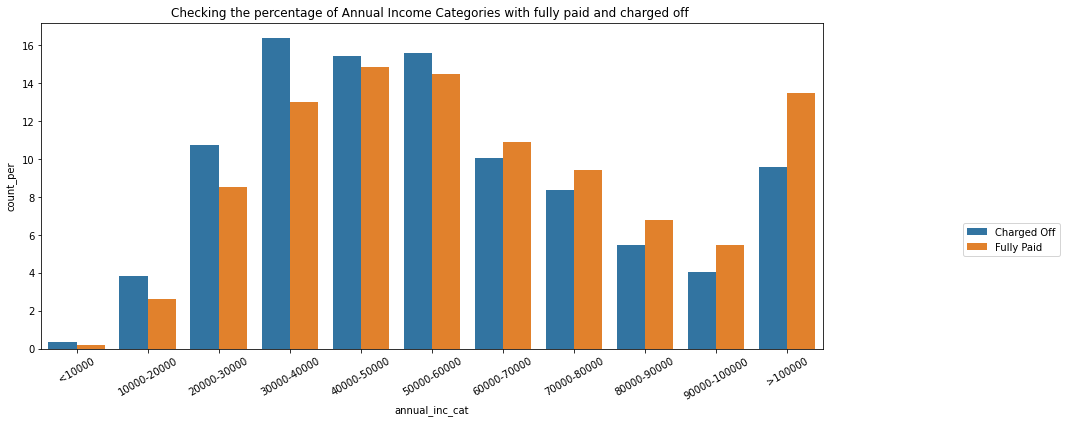

In [349]:
bins = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 250000]
labels = [ '<10000','10000-20000','20000-30000','30000-40000','40000-50000','50000-60000','60000-70000','70000-80000','80000-90000','90000-100000','>100000']
numbers['annual_inc_cat'] = pd.cut(numbers['annual_inc'], bins=bins, labels=labels)
plt.figure(figsize=(14,6))

m23 = numbers.groupby(['loan_status','annual_inc_cat'])['annual_inc_cat'].count()
data_annual_inc_grpah = m23.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
data_annual_inc_grpah1 = data_annual_inc_grpah.reset_index(name='count_per')
plt.title("Checking the percentage of Annual Income Categories with fully paid and charged off ")

plt.xticks(rotation=30)
sb.barplot(x='annual_inc_cat',y='count_per',hue='loan_status',data=data_annual_inc_grpah1)
plt.legend(bbox_to_anchor=(1.31,0.4))

In [350]:
numbers.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,loan_status,loan_amnt_cat,int_rate_cat,installment_cat,annual_inc_cat
0,5000,36,10.65,162.87,24000.0,27.65,0,1,3,0,83.7,Fully Paid,<5000,10-15,<200,20000-30000
1,2500,60,15.27,59.83,30000.0,1.00,0,5,3,0,9.4,Charged Off,<5000,10-15,<200,20000-30000
2,2400,36,15.96,84.33,12252.0,8.72,0,2,2,0,98.5,Fully Paid,<5000,15-20,<200,10000-20000
3,10000,36,13.49,339.31,49200.0,20.00,0,1,10,0,21.0,Fully Paid,5000-10000,10-15,200-400,40000-50000
5,5000,36,7.90,156.46,36000.0,11.20,0,3,9,0,28.3,Fully Paid,<5000,5-10,<200,30000-40000


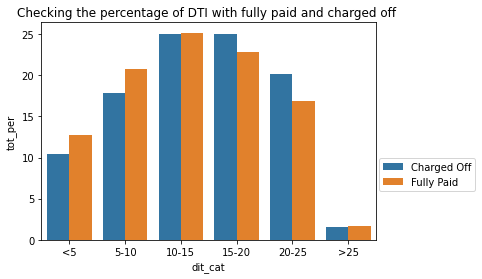

In [351]:
bins = [0,5,10,15,20,25,30]
labels = ['<5','5-10','10-15','15-20','20-25','>25']

numbers["dit_cat"] = pd.cut( numbers["dti"], bins=bins, labels=labels)
m23 = numbers.groupby(by=['loan_status','dit_cat'])['dit_cat'].count()
data_dit_cat_loan_st = m23.groupby(level =0).apply(lambda x: 100* x/float(x.sum()))
data_dit_cat_loan_st_graph = data_dit_cat_loan_st.reset_index(name='tot_per')
plt.title("Checking the percentage of DTI with fully paid and charged off ")

sb.barplot(x='dit_cat',y='tot_per',hue = "loan_status",data=data_dit_cat_loan_st_graph)
plt.legend(bbox_to_anchor=(1.31,0.4))

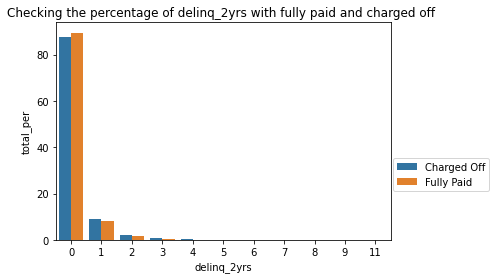

In [352]:
m24 = numbers.groupby(['loan_status','delinq_2yrs'])['delinq_2yrs'].count()
data_delinq_2yrs_per = m24.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2))
data_delinq_2yrs_per_graph = data_delinq_2yrs_per.reset_index(name='total_per')
plt.title("Checking the percentage of delinq_2yrs with fully paid and charged off ")

sb.barplot(x='delinq_2yrs', y='total_per', hue='loan_status',data=data_delinq_2yrs_per_graph)
plt.legend(bbox_to_anchor=(1.31,0.4))

<AxesSubplot:title={'center':'Checking the percentage of open account category with fully paid and charged off '}, xlabel='open_acc_cat', ylabel='total_per'>

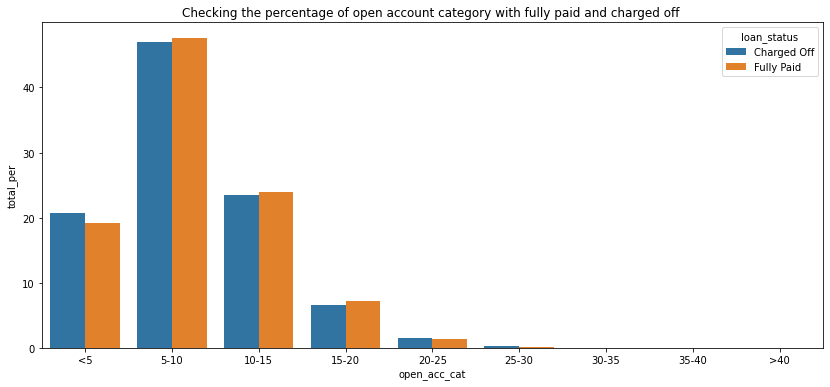

In [353]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
labels = [ '<5','5-10','10-15','15-20','20-25','25-30','30-35','35-40','>40']
numbers['open_acc_cat'] = pd.cut(numbers['open_acc'], bins=bins, labels=labels)

m25 = numbers.groupby(['loan_status','open_acc_cat'])['open_acc_cat'].count()
open_acc_cat_per = m25.groupby(level=0).apply(lambda x : 100 * x/float(x.sum()))
open_acc_cat_per_graph = open_acc_cat_per.reset_index(name='total_per')
plt.figure(figsize=(14,6))
plt.title("Checking the percentage of open account category with fully paid and charged off ")

sb.barplot(x='open_acc_cat', y='total_per', hue='loan_status',data=open_acc_cat_per_graph)

In [354]:
numbers.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,loan_status,loan_amnt_cat,int_rate_cat,installment_cat,annual_inc_cat,dit_cat,open_acc_cat
0,5000,36,10.65,162.87,24000.0,27.65,0,1,3,0,83.7,Fully Paid,<5000,10-15,<200,20000-30000,>25,<5
1,2500,60,15.27,59.83,30000.0,1.00,0,5,3,0,9.4,Charged Off,<5000,10-15,<200,20000-30000,<5,<5
2,2400,36,15.96,84.33,12252.0,8.72,0,2,2,0,98.5,Fully Paid,<5000,15-20,<200,10000-20000,5-10,<5
3,10000,36,13.49,339.31,49200.0,20.00,0,1,10,0,21.0,Fully Paid,5000-10000,10-15,200-400,40000-50000,15-20,5-10
5,5000,36,7.90,156.46,36000.0,11.20,0,3,9,0,28.3,Fully Paid,<5000,5-10,<200,30000-40000,10-15,5-10


In [355]:
numbers.open_acc.unique()

array([ 3,  2, 10,  9,  7,  4, 11, 14, 12, 20,  8,  6, 15, 17,  5, 13, 16,
       30, 21, 18, 19, 27, 23, 34, 25, 22, 24, 26, 32, 28, 29, 33, 31, 39,
       35, 36, 38, 44, 41, 42], dtype=int64)

<AxesSubplot:title={'center':'Checking the percentage of pub_rec with fully paid and charged off '}, xlabel='pub_rec', ylabel='total_per'>

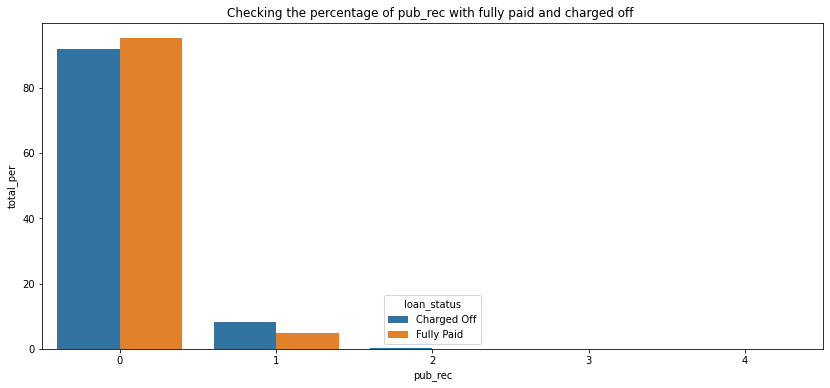

In [356]:
m27 = numbers.groupby(['loan_status','pub_rec'])['pub_rec'].count()
data_pub_rec_loan_status = m27.groupby(level=0).apply(lambda x : 100 * x/float(x.sum()))
data_pub_rec_loan_status_graph = data_pub_rec_loan_status.reset_index(name='total_per')
plt.figure(figsize=(14,6))
plt.title("Checking the percentage of pub_rec with fully paid and charged off ")

sb.barplot(x='pub_rec', y='total_per', hue='loan_status',data=data_pub_rec_loan_status_graph)

<AxesSubplot:title={'center':'Checking the percentage of revol_util_category with fully paid and charged off '}, xlabel='revol_util_cat', ylabel='total_per'>

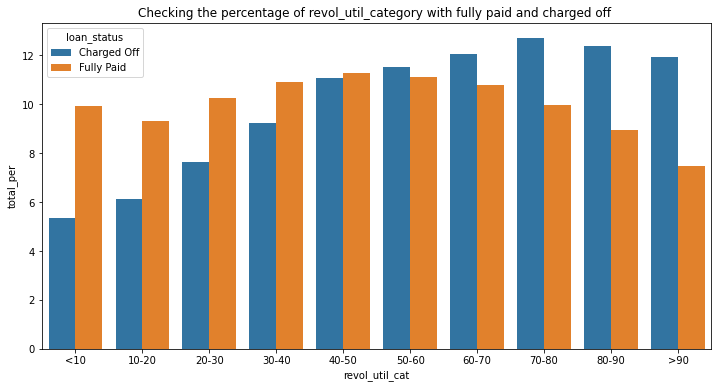

In [357]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [ '<10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90', '>90']
numbers['revol_util_cat'] = pd.cut(numbers['revol_util'], bins=bins, labels=labels)

#Get the count of Grouped by loan_status and plot
revol_util_cat = numbers.groupby(['loan_status','revol_util_cat'])['revol_util_cat'].count()
revol_util_cat_per = revol_util_cat.groupby(level=0).apply(lambda x : round(100 * x/float(x.sum()), 2)).reset_index(name='total_per')
revol_util_cat_per.sort_values('total_per', ascending=False)
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
plt.title("Checking the percentage of revol_util_category with fully paid and charged off ")

sb.barplot(x='revol_util_cat', y='total_per', hue='loan_status',data=revol_util_cat_per)

# Multivariate Analysis - Correlation between the identified variables

<AxesSubplot:>

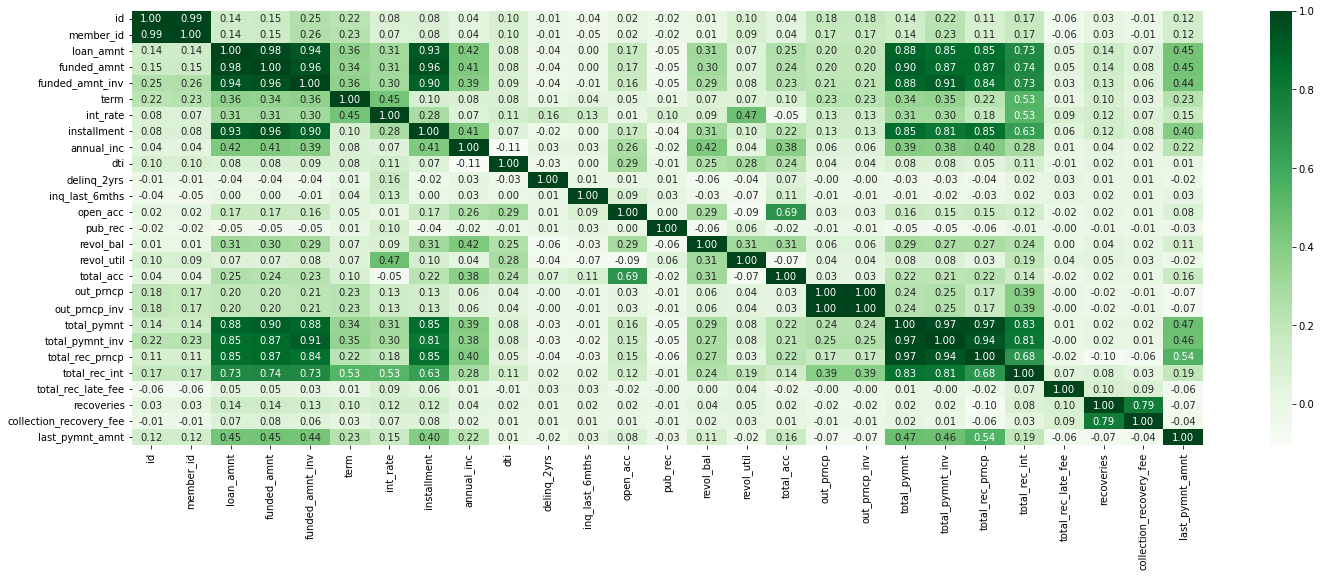

In [358]:
# Identified variable 
fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sb.heatmap(cateogrical_dataframe_of_loan.corr(),cmap = "Greens",annot=True, fmt=".2f")

<AxesSubplot:>

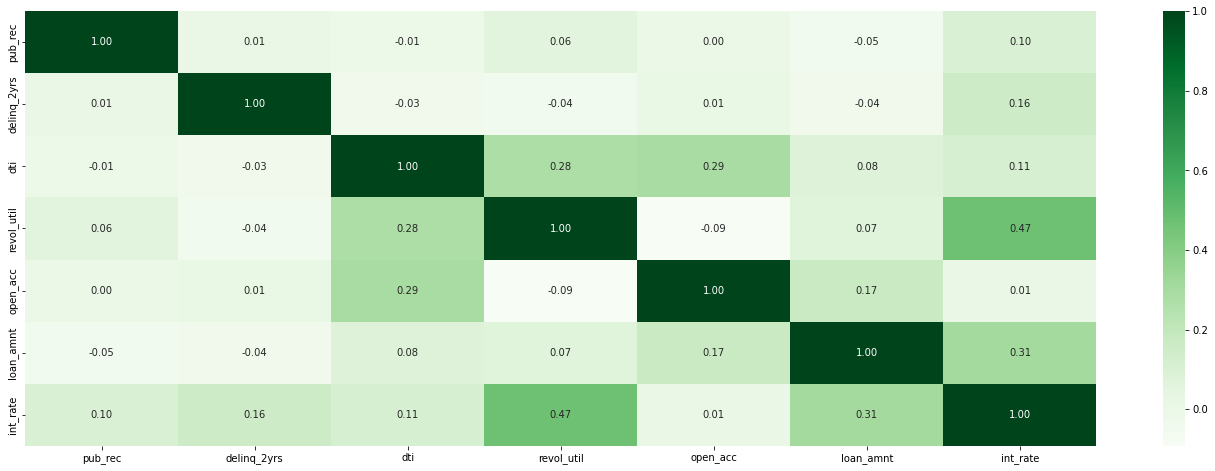

In [359]:
#  So some of these are not have any sense to analyse like id,term etc so to get rid from these to make data visualize clearly
final_loan = cateogrical_dataframe_of_loan[['pub_rec','delinq_2yrs','dti','revol_util','home_ownership','open_acc','loan_amnt','int_rate','grade','loan_status']]

fig, ax = plt.subplots()
fig.set_size_inches(24,8)
sb.heatmap(final_loan.corr(),cmap="Greens", annot=True, fmt=".2f")